 **Telco Customer Churn Project**

### Team: Team Namibia
#### Author: Brian Siaw

## Table of Contents


[**Business Understanding**](#Business-Understanding)

[**Data Understanding**](#Data-Understanding)

[**Exploratory Data Analysis**](#exploratory-data-analysis)

[**Check Data Quality**](#Check-Data-Quality)

[**Hypothesis Testing**](#hypothesis-testing)

[**Analytical Questions**](#analytical-questions)

[**Data Preparation**](#Data-Preparation)
 



## Business Understanding
This project analyzes and predicts customer churn rate for a telecommunications company using Python and machine learning. Customer churn refers to the rate at which customers stop using the company's services. Identifying key factors influencing churn allows the company to implement strategies for customer retention and churn reduction.


#### Problem Statement:
The telecommunications company is experiencing a high rate of customer churn, which negatively impacts revenue and growth. Despite efforts to retain customers, the company lacks a systematic and data-driven approach to identifying the key factors driving churn and predicting which customers are most likely to leave. This project aims to address this issue by leveraging machine learning techniques to analyze customer data, identify patterns and predictors of churn, and develop a predictive model to help the company implement targeted retention strategies.



#### Goal and Objectives
##### Goal
 Identify factors contributing to customer churn and develop a predictive model to forecast churn accurately. This enables the company to take proactive measures to improve customer retention.

 ##### Objective
1. Data Collection & Cleaning: Gather and preprocess customer data from various sources.
2. Exploratory Data Analysis (EDA): Understand underlying patterns and trends in the data.
3. Feature Engineering: Create relevant features to improve the model's predictive power.
4. Model Building: Develop and train machine learning models to predict customer churn.
5. Model Evaluation: Evaluate model performance using appropriate metrics.
6. Recommendations: Provide actionable insights and recommendations to the Telco company to reduce churn.

#### Stakeholders
1. Management: Interested in overall churn rates and revenue impact.
2. Marketing Team: Needs to understand customer segments at higher churn risk.
3. Customer Service Team: Can use insights to improve customer support and retention strategies 
4. Product Development Team: Can use feedback to enhance service offerings.

#### Key Metrics and Success Criteria
#### Key Metrics:
1. Churn Rate: Percentage of customers who stop using the service within a specific period.
2. Accuracy: Proportion of correctly predicted churn vs. non-churn instances.
3. Precision & Recall: Precision measures positive prediction accuracy, while recall measures identifying actual churn cases.
4. F1 Score: Harmonic mean of precision and recall.
5. ROC-AUC: Area Under the Receiver Operating Characteristic Curve, indicating the model's ability to distinguish between classes.

#### Success Criteria:
1. Achieve a predictive model with at least 85% accuracy.
2. High precision and recall scores (above 80%).
3. Implement recommendations that result in a measurable decrease in churn rate over the next year.

#### Hypothesis (Null and Alternate)
Null Hypothesis (H0): There is no significant relationship between customer features (contract type, monthly charges, tenure, dependents, etc.) and customer churn.
Alternate Hypothesis (H1): There is a significant relationship between the selected customer features and customer churn.

#### Business Analytical Questions
1. What are the primary factors influencing customer churn in the telecommunications industry?

Objective: Identify and analyze key factors like service quality, pricing, customer service interactions, and contract types that contribute to customer churn. Look for trends and patterns in these factors to understand their impact on customer retention.

2. How does contract type affect the likelihood of customer churn?

Objective: Examine the relationship between different contract types (e.g., month-to-month, one-year, two-year contracts) and churn rates. Determine if certain contract types are associated with higher or lower churn.

3. How does tenure affect customer churn?

Objective: Examine the relationship between churn rate and higher or lower tenure

4. How do demographic factors (senior citizen, dependents, partner) impact customer churn?

Objective: Assess the influence of demographic factors such senior citizen status and partner status on customer churn. Determine if certain demographic segments are more likely to churn and explore potential reasons.

5. What is the impact of monthly charges and total charges on the likelihood of a customer churning?

Objective: Analyze how monthly charges and total charges affect churn rates. Identify pricing thresholds that lead to higher churn and understand how customer loyalty changes over time.


#### Scope and Constraints
#### Scope:
Analysis limited to customer data provided by the telecommunications company.
Focus on developing a machine learning model to predict churn and providing actionable insights based on the model's findings.

#### Constraints:
1. Data availability and quality: The analysis depends on the accuracy and completeness of the customer data.
2. Resource limitations: Time and computational resources for data processing and model training.
3. Privacy concerns: Ensuring customer data is handled securely in order to maintain confidentiality and privacy.



## Data Understanding

The being used for this project is obtained from 3 data sources. The first two datasets will be used to train the model and the tbird will be used to test the model.

- The first dataset is hosted on a databse on the Microsoft SQL Server
- The second dataset was obtained from a Github repository
- The third dataset was obtained from OneDrive

### Load Data

#### Install pyodbc and python-dotenv if necessary

In [125]:
# # For creating a connection
# !pip install pyodbc 

# # For loading environment variables
# !pip install python-dotenv  

# # For creating visualizations
# !pip install matplotlib
# !pip install seaborn

# # For statistical model analysis
# !pip install statsmodels

# #For reading .xlsx files
# !pip install openpyxl


#### Import the necessary packages

In [126]:
# Import the pyodbc library to handle ODBC database connections
import pyodbc 

# Import the dotenv function to load environment variables from a .env file
from dotenv import dotenv_values 

# Import the pandas library for data manipulation and analysis
import pandas as pd 
import numpy as np

# Import Matplotlib for  visualizations in Python
import matplotlib.pyplot as plt

# Import Seaborn for statistical data visualization based on Matplotlib
import seaborn as sns

# Import the warnings library to handle warning messages
import warnings

# Filter out (ignore) any warnings that are raised
warnings.filterwarnings('ignore')

# Import re for string manipulation (searching, matching, and modifying strings based on specific patterns)
import re

# Import for statistical model analysis
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import LabelEncoder

#### Establishing a connection to the SQL database

In [127]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
database = environment_variables.get('DATABASE')
server = environment_variables.get('SERVER')
username = environment_variables.get('UID')
password = environment_variables.get('PWD')

connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [128]:
# Use the connect method of the pyodbc library and pass in the connection string.
connection = pyodbc.connect(connection_string)

#### Load Dataset 1

In [129]:
query = 'Select * from dbo.LP2_Telco_churn_first_3000'
df1= pd.read_sql(query, connection)
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [130]:
df1.to_csv('Telco-churn-first-2000.csv')

#### Load Dataset 2

In [131]:
df2 = pd.read_csv(r'\\Mac\Home\Downloads\Customer_Churn_ML_Prediction\dataset\LP2_Telco-churn-second-2000.csv')
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


#### Load Dataset 3

In [132]:
df3 = pd.read_excel(r'\\Mac\Home\Downloads\Customer_Churn_ML_Prediction\dataset\Telco-churn-last-2000.xlsx')
df3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


### Feature Description

The following describes the columns present in the data.

Gender -- Whether the customer is a male or a female

SeniorCitizen -- Whether a customer is a senior citizen or not

Partner -- Whether the customer has a partner or not (Yes, No)

Dependents -- Whether the customer has dependents or not (Yes, No)

Tenure -- Number of months the customer has stayed with the company

Phone Service -- Whether the customer has a phone service or not (Yes, No)

MultipleLines -- Whether the customer has multiple lines or not

InternetService -- Customer's internet service provider (DSL, Fiber Optic, No)

OnlineSecurity -- Whether the customer has online security or not (Yes, No, No Internet)

OnlineBackup -- Whether the customer has online backup or not (Yes, No, No Internet)

DeviceProtection -- Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport -- Whether the customer has tech support or not (Yes, No, No internet)

StreamingTV -- Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

Contract -- The contract term of the customer (Month-to-Month, One year, Two year)

PaperlessBilling -- Whether the customer has paperless billing or not (Yes, No)

Payment Method -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))

MonthlyCharges -- The amount charged to the customer monthly

TotalCharges -- The total amount charged to the customer

Churn -- Whether the customer churned or not (Yes or No)



### Data Inspection

In [133]:
# Viewing the columns in df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [134]:
# Viewing the columns in df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [135]:
# Viewing the columns in df3
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [136]:
# Viewing the number of missing values within the columns in df1
df1.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [137]:
#defining a function that checks for duplicate rows ina  dataframe
    
    
def check_duplicates(df):
    """
    This function takes a pandas DataFrame and checks for duplicates.
    
    Parameters:
    df (pd.DataFrame): DataFrame to check for duplicates.
    
    Returns:
    tuple: A string message indicating the number of duplicate rows or that there are no duplicates,
           and a DataFrame containing the duplicate rows.
    """
    # Check for number of duplicates in DataFrame
    duplicate_count = df.duplicated().sum()
    
    # Extract the duplicate rows
    duplicate_rows = df[df.duplicated(keep=False)]

    if duplicate_count > 0:
        return f'Number of duplicate rows: {duplicate_count}', duplicate_rows
    else:
        return f'There are no duplicates in the DataFrame.'
       
 

In [138]:
#checking for duplicate rows in df1
check_duplicates(df1)

'There are no duplicates in the DataFrame.'

In [139]:
#checking for duplicate rows in df2
check_duplicates(df2)

'There are no duplicates in the DataFrame.'

In [140]:
#checking for duplicate rows in df3
check_duplicates(df3)

'There are no duplicates in the DataFrame.'

### Observations

- df1 (dataset on the first 2000) and df2 (dataset on the second 2000) are identical with all the 21 columns being present
- df3 (dataset on the first 2000) has 20 columns with the Churn column missing as this is the test data on which we aim to predict churn.
- df2 and df3 have no missing values 
- df1 has 7 columns with missing values. 
- df2 and df3 have 3 types of data (float, integers and objects). Monthly charges is the only float, tenure and senior citizen ( 1 to represent yes and 0 to represent no) are the only integers with the rest being objects.
- df1 has 4 types of data (float, integers, objects and bool) with 5 columns such as SeniorCitizen, Partner, Dependent, PhoneService and PaperlessBilling being bool.
- All of the dataframes (df1, df2, df3) have no duplicate rows
- All the 6 services related to Internet Service had the same number of missing values, 651.

### Merging data

Although the df3 has been assigned the test data and df1 and df2 have been assigned the train data, the three are being merged for the data cleaning process to ensure consistency and uniformity. 



In [141]:
#adding label columns to identify unique datasets
df1['label']= 'df1'
df2['label']= 'df2'
df3['label']= 'df3'

# Concatenating DataFrames
combined_df = pd.concat([df1, df2, df3], ignore_index=True)

combined_df


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,label
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False,df1
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,False,False,False,One year,False,Mailed check,56.950001,1889.5,False,df1
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True,df1
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False,df1
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True,df1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7912-SYRQT,Female,0,No,No,7,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.100000,552.95,NaN,df3
7039,3557-HTYWR,Female,0,No,No,47,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Two year,No,Mailed check,74.050000,3496.3,NaN,df3
7040,4816-JBHOV,Male,1,No,No,2,Yes,No,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,44.700000,93.7,NaN,df3
7041,8920-NAVAY,Male,1,No,No,62,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.750000,7053.35,NaN,df3


### Summary Statistics, Distribution and Correlation

In [142]:
#Obtaining summary statistics for numerical coclumns
combined_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.000000,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.000000,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.349998,89.85,118.75


In [143]:
#Obtaining summary statistics for categorical coclumns
combined_df.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,4,No,2103
Dependents,7043,4,No,2863
PhoneService,7043,4,Yes,3630
MultipleLines,6774,5,No,1953
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,6392,5,No,2020
OnlineBackup,6392,5,No,1768
DeviceProtection,6392,5,No,1799


<function matplotlib.pyplot.show(close=None, block=None)>

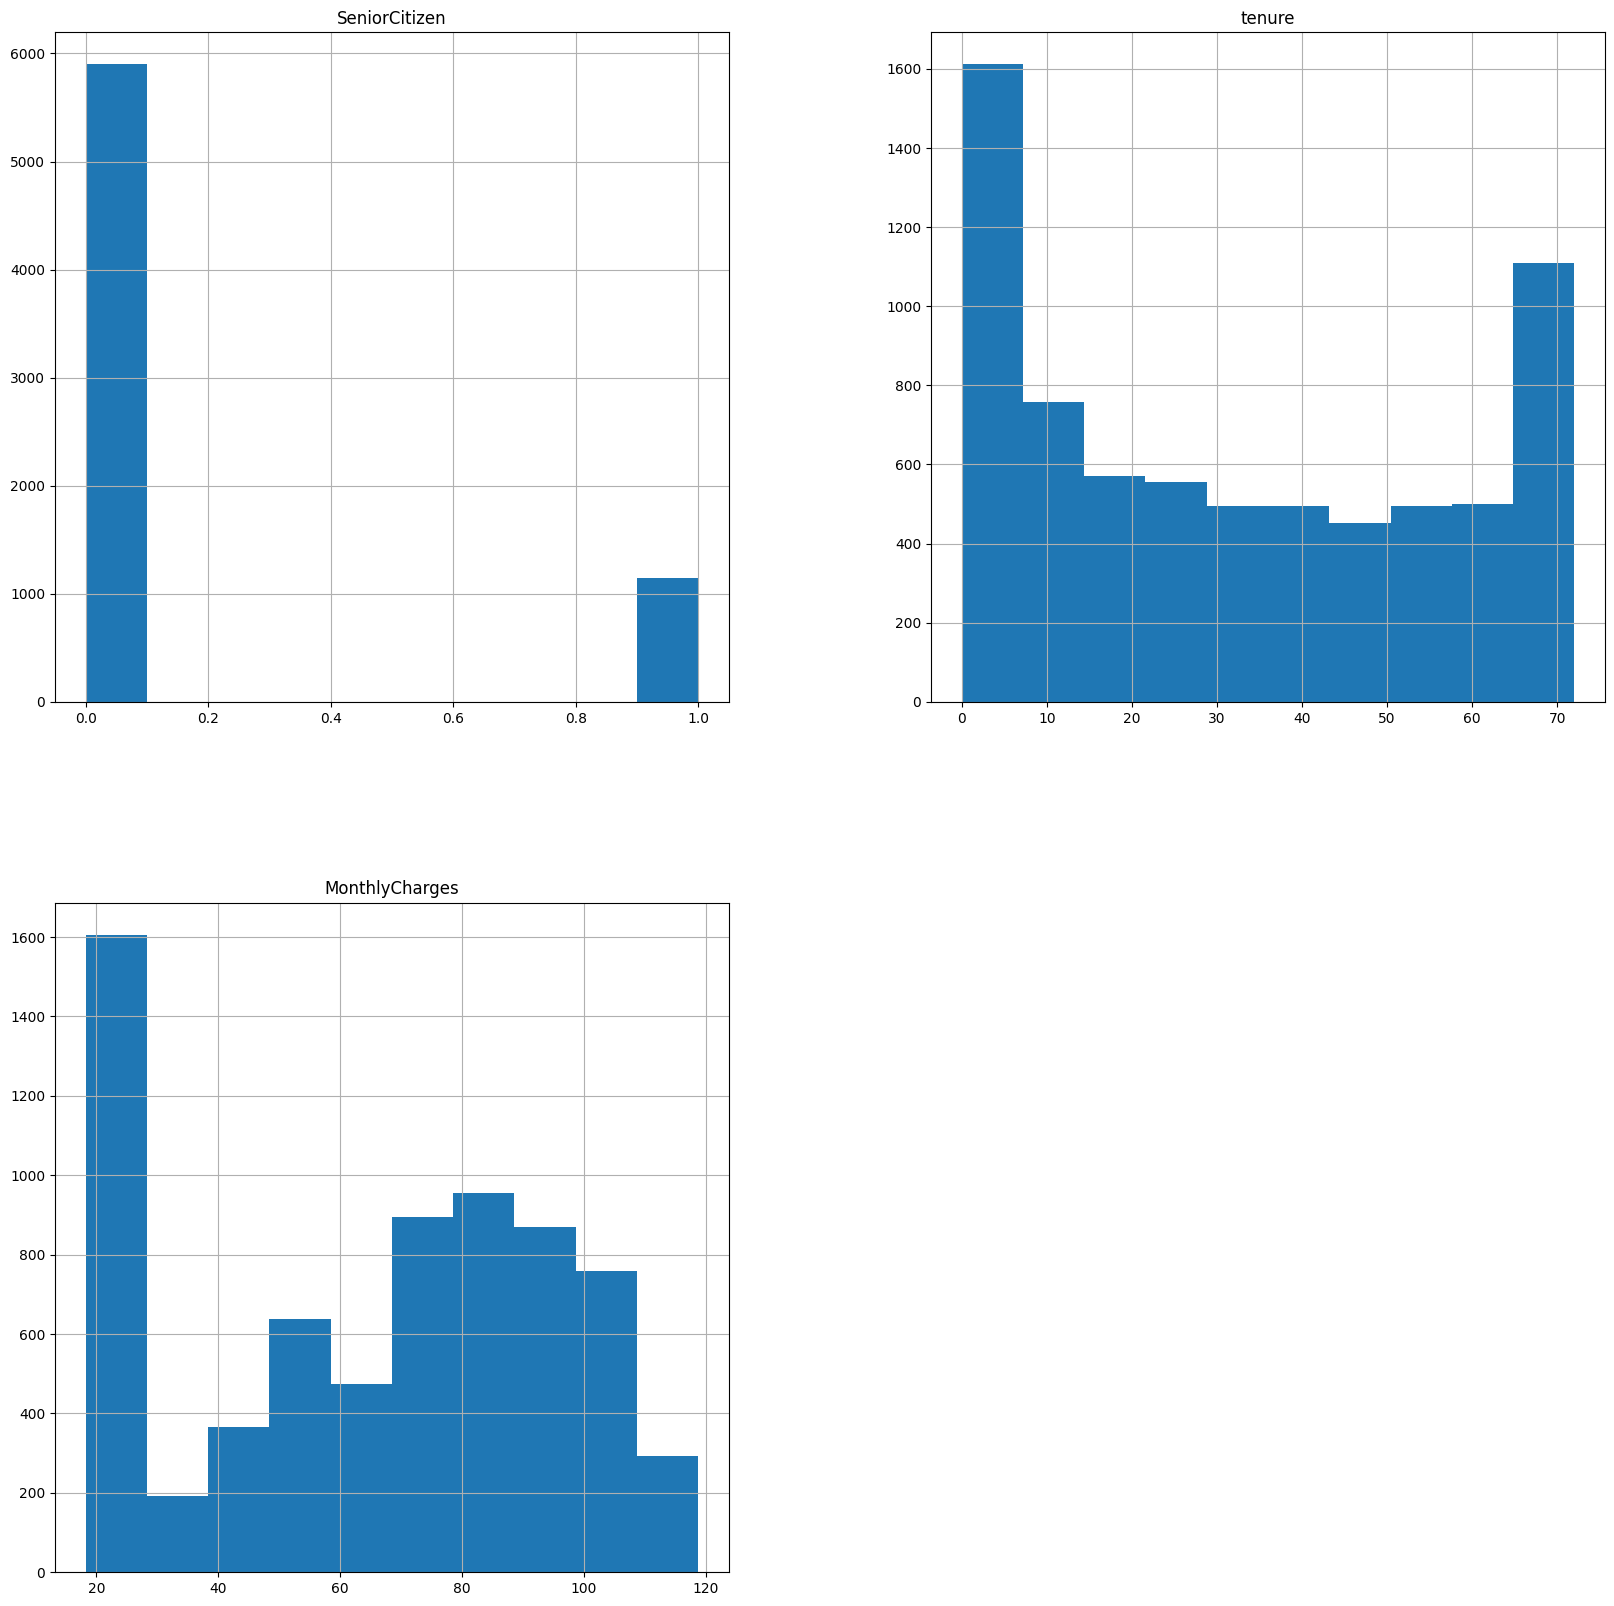

In [144]:
#distribution of numerical columns
combined_df.hist(figsize= (20, 20))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

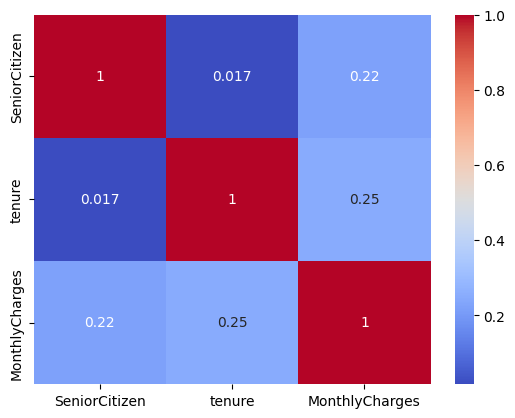

In [145]:
#filtering the numerical columns into a new dataframe
numerical_df= combined_df.select_dtypes(include=[np.number])
#creating a correlation matrix
corr_df= numerical_df.corr()
sns.heatmap(corr_df, annot=True, cmap='coolwarm')
plt.show

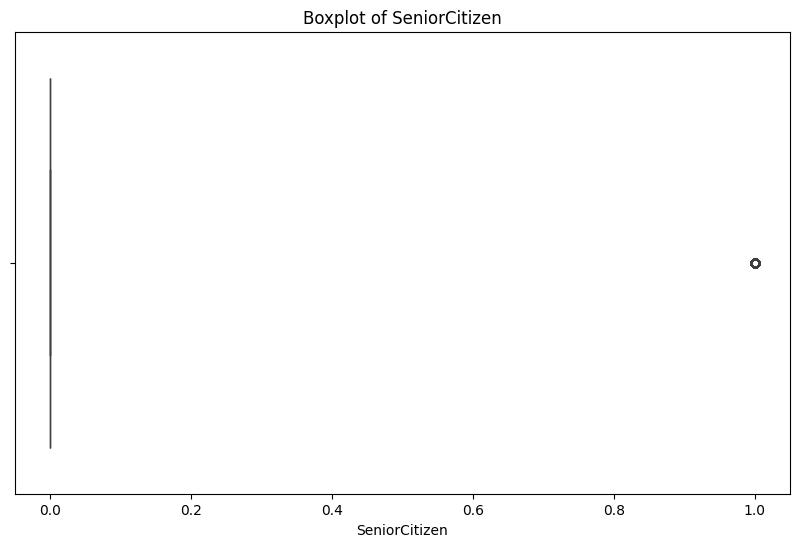

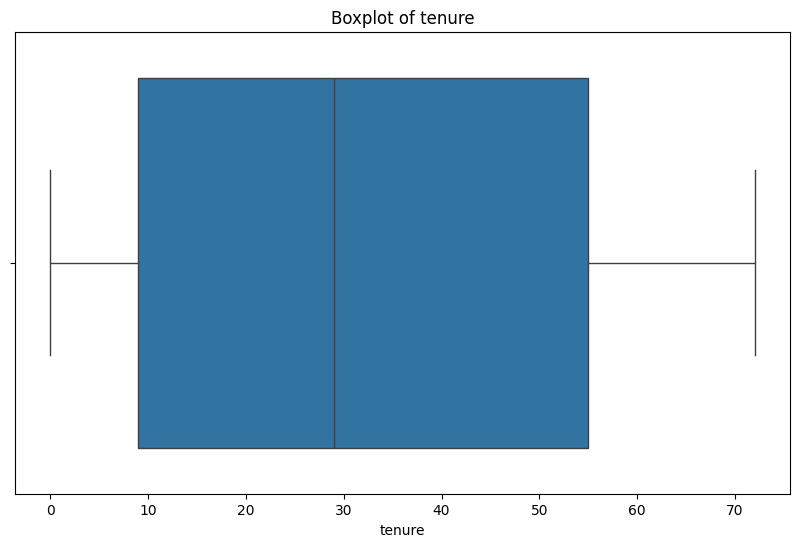

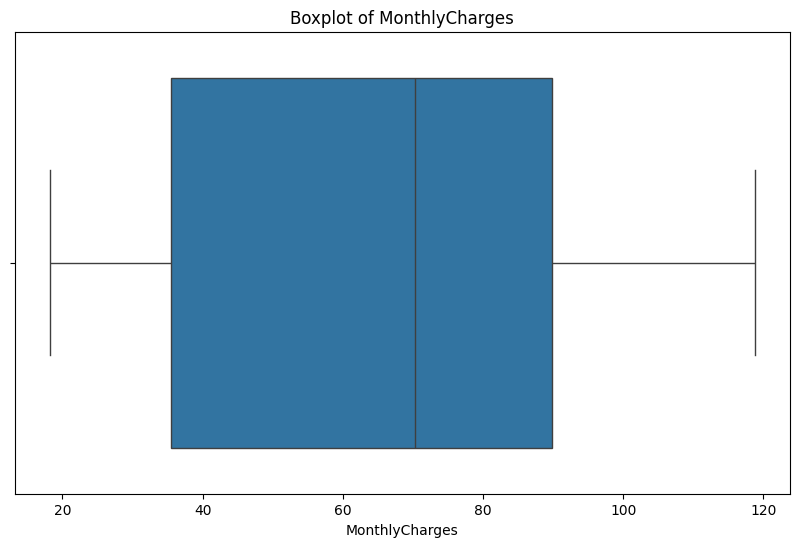

In [146]:

#Checking for outliers in the numerical columns
for col in numerical_df:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=combined_df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

#### Observations

- Several columns where only 2 responses (True/False) where expected had more than 2 unique values
- There are fewer senior citizens (represented by 1) than non-senior citizens (represented by 0)
- Tenure has a bimodal U-shaped distribution with the 2 peaks at the extreme ends
- The monthly charges is skewed to the left and also has three peaks; the highest at the very beginning and the others in the middle region of the distribution.
- There's weak correlation amongst the numerical columns but the highest correlation was between Tenure and Monthly Charges at 0.25
- The numerical columns (tenure and MonthlyCharges) had no outliers. Senior Citizen is made up of 0,1 represent No and Yes.


## Exploratory Data Analysis 

The section involves restructuring our data appropriately, by cleaning it and then performing some analysis on it; hopefully to derive meaning from insights from it.



In [147]:
#handling data types
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     6774 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    6392 non-null   object 
 10  OnlineBackup      6392 non-null   object 
 11  DeviceProtection  6392 non-null   object 
 12  TechSupport       6392 non-null   object 
 13  StreamingTV       6392 non-null   object 
 14  StreamingMovies   6392 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Ensuring Data Consistency

The aim to make sure the data is cleaned so as to have the same/consistent formats for the different variables. Here also the right data types would be applied to the different columns.

Several columns (Partner, Dependents, PhoneService, MultipleLines, etc), have both Yes & No as well as True & False to represent the same thing. To ensure data consistency the Yes & No were replaced with True and False

The TotalCharges had a blank entry which prevented it from being identified as a float thus the the blank was replaced with NaN.

##### Viewing the Unique values in each column

In [148]:
#defining a function to print the unique values and frequency for a column in a dataframe

def unique(df, col):
    return df[col].value_counts()

In [149]:
unique(combined_df, 'gender')

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [150]:
unique(combined_df, 'SeniorCitizen')

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [151]:
unique(combined_df, 'Partner')

Partner
No       2103
Yes      1940
False    1538
True     1462
Name: count, dtype: int64

In [152]:
unique(combined_df, 'Dependents')

Dependents
No       2863
False    2070
Yes      1180
True      930
Name: count, dtype: int64

In [153]:
unique(combined_df, 'PhoneService')

PhoneService
Yes      3630
True     2731
No        413
False     269
Name: count, dtype: int64

In [154]:
unique(combined_df, 'MultipleLines')

MultipleLines
No                  1953
Yes                 1677
False               1437
True                1294
No phone service     413
Name: count, dtype: int64

In [155]:
unique(combined_df, 'InternetService')

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [156]:
unique(combined_df, 'OnlineSecurity')

OnlineSecurity
No                     2020
False                  1478
Yes                    1148
No internet service     875
True                    871
Name: count, dtype: int64

In [157]:
unique(combined_df, 'OnlineBackup')

OnlineBackup
No                     1768
Yes                    1400
False                  1320
True                   1029
No internet service     875
Name: count, dtype: int64

In [158]:
unique(combined_df, 'DeviceProtection')

DeviceProtection
No                     1799
Yes                    1369
False                  1296
True                   1053
No internet service     875
Name: count, dtype: int64

In [159]:
unique(combined_df, 'OnlineBackup')

OnlineBackup
No                     1768
Yes                    1400
False                  1320
True                   1029
No internet service     875
Name: count, dtype: int64

In [160]:
unique(combined_df, 'TechSupport')

TechSupport
No                     1997
False                  1476
Yes                    1171
No internet service     875
True                    873
Name: count, dtype: int64

In [161]:
unique(combined_df, 'StreamingMovies')

StreamingMovies
No                     1635
Yes                    1533
True                   1199
False                  1150
No internet service     875
Name: count, dtype: int64

In [162]:
unique(combined_df, 'StreamingTV')

StreamingTV
No                     1620
Yes                    1548
False                  1190
True                   1159
No internet service     875
Name: count, dtype: int64

In [163]:
unique(combined_df, 'Contract')

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [164]:
unique(combined_df, 'OnlineBackup')

OnlineBackup
No                     1768
Yes                    1400
False                  1320
True                   1029
No internet service     875
Name: count, dtype: int64

In [165]:
unique(combined_df, 'PaperlessBilling')

PaperlessBilling
Yes      2395
True     1776
No       1648
False    1224
Name: count, dtype: int64

In [166]:
unique(combined_df, 'PaymentMethod')

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [167]:
unique(combined_df, 'Churn')

Churn
False    2219
No       1487
True      780
Yes       556
Name: count, dtype: int64

In [168]:
unique(combined_df, 'MonthlyCharges')

MonthlyCharges
20.000000     43
20.250000     39
19.750000     39
20.050000     37
19.500000     32
              ..
88.400002      1
107.650002     1
109.599998     1
34.500000      1
30.050000      1
Name: count, Length: 2351, dtype: int64

In [169]:
unique(combined_df, 'TotalCharges')

TotalCharges
19.75          7
               6
20.25          5
20.450001      5
20.2           5
              ..
3520.75        1
2416.550049    1
2654.050049    1
7904.25        1
301.55         1
Name: count, Length: 6791, dtype: int64

##### String data cleaning involving Boolean value columns and Total Charges

In [170]:
# replacing the ' ' with Nan within the TotalCharges column
combined_df['TotalCharges'] = pd.to_numeric(combined_df['TotalCharges'], errors= 'coerce')


In [171]:
#making a list of columns that are comprised of boolean values and yes and no entries
yes_no_columns= ['Partner','Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn' ]

In [172]:
#replacing the Yes and No with True and False (boolean values)
def yes_no_replace(df, col):
    df[col] = df[col].replace({'Yes': True, 'No': False, 'No internet service' : False, 'No phone service' : False})
    return df


# Apply the function to each column in the  yes_no_columns' list
for col in yes_no_columns:
    combined_df = yes_no_replace(combined_df, col)

#viewing the yes_no_columns to see on ensure unique responses
combined_df.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
MultipleLines,6774,2,False,3803
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,6392,2,False,4373
OnlineBackup,6392,2,False,3963
DeviceProtection,6392,2,False,3970
TechSupport,6392,2,False,4348
StreamingTV,6392,2,False,3685
StreamingMovies,6392,2,False,3660


In [173]:
#assigning the columns with their appropriate data types

combined_df['gender'] = combined_df['gender'].astype('category')
combined_df['Partner'] = combined_df['Partner'].astype('category')
combined_df['Dependents'] = combined_df['Dependents'].astype('category')
combined_df['PhoneService'] = combined_df['PhoneService'].astype('category')
combined_df['MultipleLines'] = combined_df['MultipleLines'].astype('category')
combined_df['InternetService'] = combined_df['InternetService'].astype('category')
combined_df['OnlineSecurity'] = combined_df['OnlineSecurity'].astype('category')
combined_df['OnlineBackup'] = combined_df['OnlineBackup'].astype('category')
combined_df['DeviceProtection'] = combined_df['DeviceProtection'].astype('category')
combined_df['TechSupport'] = combined_df['TechSupport'].astype('category')
combined_df['StreamingTV'] = combined_df['StreamingTV'].astype('category')
combined_df['StreamingMovies'] = combined_df['StreamingMovies'].astype('category')
combined_df['Contract'] = combined_df['Contract'].astype('category')
combined_df['PaperlessBilling'] = combined_df['PaperlessBilling'].astype('category')
combined_df['PaymentMethod'] = combined_df['PaymentMethod'].astype('category')
combined_df['TotalCharges'] = combined_df['TotalCharges'].astype('float')
combined_df['Churn'] = combined_df['Churn'].astype('category')

In [174]:
#verifying that the columns have been assigned with the appropriate data types
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     6774 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    6392 non-null   category
 10  OnlineBackup      6392 non-null   category
 11  DeviceProtection  6392 non-null   category
 12  TechSupport       6392 non-null   category
 13  StreamingTV       6392 non-null   category
 14  StreamingMovies   6392 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

### Handling Missing Data

In [175]:
combined_df.isna().sum()

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines        269
InternetService        0
OnlineSecurity       651
OnlineBackup         651
DeviceProtection     651
TechSupport          651
StreamingTV          651
StreamingMovies      651
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges          11
Churn               2001
label                  0
dtype: int64

In [176]:
#A list of columns using internet services
internet_services= ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies' ]

#checking for missing values within the internet services column
misin_serv= combined_df[internet_services].isna().any(axis=1)

#viewing the resulting dataframe of missing internet services
misin_df= combined_df[misin_serv]
misin_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,label
11,7469-LKBCI,Male,0,False,False,16,True,False,No,NaN,...,NaN,NaN,NaN,Two year,False,Credit card (automatic),18.950001,326.799988,False,df1
16,8191-XWSZG,Female,0,False,False,52,True,False,No,NaN,...,NaN,NaN,NaN,One year,False,Mailed check,20.650000,1022.950012,False,df1
21,1680-VDCWW,Male,0,True,False,12,True,False,No,NaN,...,NaN,NaN,NaN,One year,False,Bank transfer (automatic),19.799999,202.250000,False,df1
22,1066-JKSGK,Male,0,False,False,1,True,False,No,NaN,...,NaN,NaN,NaN,Month-to-month,False,Mailed check,20.150000,20.150000,True,df1
33,7310-EGVHZ,Male,0,False,False,1,True,False,No,NaN,...,NaN,NaN,NaN,Month-to-month,False,Bank transfer (automatic),20.200001,20.200001,False,df1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2984,6765-MBQNU,Female,0,True,False,26,True,True,No,NaN,...,NaN,NaN,NaN,One year,False,Mailed check,26.000000,684.049988,False,df1
2987,3769-MHZNV,Female,0,True,True,33,True,False,No,NaN,...,NaN,NaN,NaN,Two year,False,Mailed check,20.100000,670.349976,False,df1
2989,3308-MHOOC,Male,0,False,True,1,True,False,No,NaN,...,NaN,NaN,NaN,Month-to-month,True,Mailed check,19.200001,19.200001,False,df1
2993,2239-CFOUJ,Male,0,True,True,1,True,False,No,NaN,...,NaN,NaN,NaN,One year,False,Mailed check,20.400000,20.400000,False,df1


In [177]:
#displaying the dataframe for missing data in the Multiple lines column
misin_mult= combined_df['MultipleLines'].isna()
misin_mult_df= combined_df[misin_mult]
misin_mult_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,label
0,7590-VHVEG,Female,0,True,False,1,False,NaN,DSL,False,...,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False,df1
3,7795-CFOCW,Male,0,False,False,45,False,NaN,DSL,True,...,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False,df1
7,6713-OKOMC,Female,0,False,False,10,False,NaN,DSL,True,...,False,False,False,Month-to-month,False,Mailed check,29.750000,301.899994,False,df1
20,8779-QRDMV,Male,1,False,False,1,False,NaN,DSL,False,...,False,False,True,Month-to-month,True,Electronic check,39.650002,39.650002,True,df1
27,8665-UTDHZ,Male,0,True,True,1,False,NaN,DSL,False,...,False,False,False,Month-to-month,False,Electronic check,30.200001,30.200001,True,df1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2972,9443-JUBUO,Male,0,True,True,72,False,NaN,DSL,True,...,True,True,True,Two year,True,Credit card (automatic),65.250000,4478.850098,False,df1
2990,2309-OSFEU,Male,0,False,False,10,False,NaN,DSL,False,...,False,False,True,Month-to-month,True,Mailed check,33.900002,298.450012,True,df1
2992,4177-JPDFU,Male,0,False,False,12,False,NaN,DSL,False,...,True,False,False,Month-to-month,False,Mailed check,34.000000,442.450012,False,df1
2994,8046-DNVTL,Male,0,True,False,62,False,NaN,DSL,True,...,True,False,False,Two year,True,Credit card (automatic),38.599998,2345.550049,False,df1


### Observations

- For the different internet services that each have 651 missing values, it can be observed that they each had No internet service and as such cannot utilize any of the internet services. As a result, all of those missing values would be filled with False since they don't use such internet services.


- For the MultipleLines column, all the rows that have missing values also had False for PhoneService indicating that since they don't have any phone service, they can't have multiple lines. Likewise, all of those missing values for MultipleLines would be filled with False.

- For the TotalCharges column that has 11 missing values, this is because the tenure for those entries is 0 as the customer hasn't lasted a month with the company and thus hasn't yet been billed. For those values, we can fill them with 0 

In [178]:
import numpy as np

# List of columns to fill missing values
columns_to_fill = ['MultipleLines'] + internet_services

# Fill missing values in the specified columns
for col in columns_to_fill:
    combined_df[col] = combined_df[col].replace('', np.nan)  
    combined_df[col] = combined_df[col].fillna(False)      

#Filling the missing values in the total charges column with 0
combined_df['TotalCharges'] = combined_df['TotalCharges'].fillna(0)

#checking for missing values
combined_df.isna().sum()


customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn               2001
label                  0
dtype: int64

In [179]:
#splitting clean data into train and test data
test_data_df= combined_df.copy()
train_data_df= combined_df.copy()

#saving data with missing churn values to Test_Data_Df
test_data_df= combined_df[combined_df['Churn'].isna()]

#saving data with missing churn values to Train_Data_Df
train_data_df= combined_df[combined_df['Churn'].notna()]


### Univariate Analysis

To gain a better appreciation of the data we have, we will perform a histogram on numerical columns and bar plots on the categorical columns. The Bar plot will help us to understand the frequency distribution of categories and identify any dominant or underrepresented categories whilst the histogram along with the boxplot will help us understand the distribution of numerical variables, identify skewness, and detect outliers.

<function matplotlib.pyplot.show(close=None, block=None)>

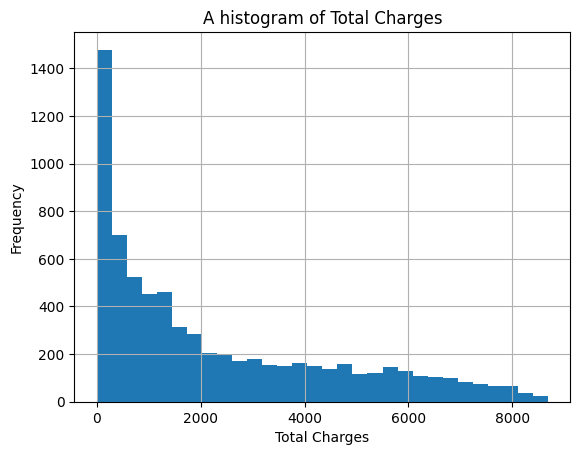

In [180]:
#distribution of numerical columns
combined_df['TotalCharges'].hist(bins=30)
plt.ylabel('Frequency')
plt.xlabel('Total Charges')
plt.title('A histogram of Total Charges')
plt.show

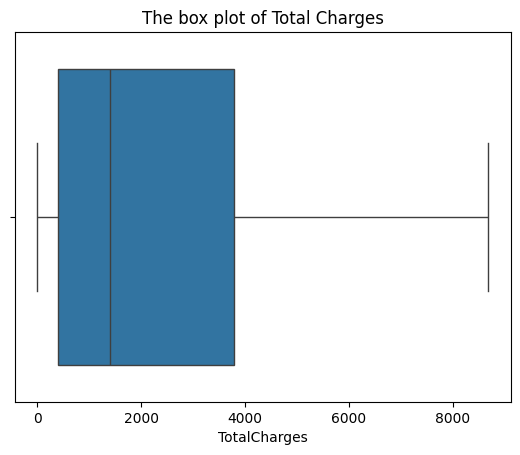

In [181]:
#detecting outliers in the total charges column
sns.boxplot(x= combined_df['TotalCharges'])
plt.title('The box plot of Total Charges')
plt.show()

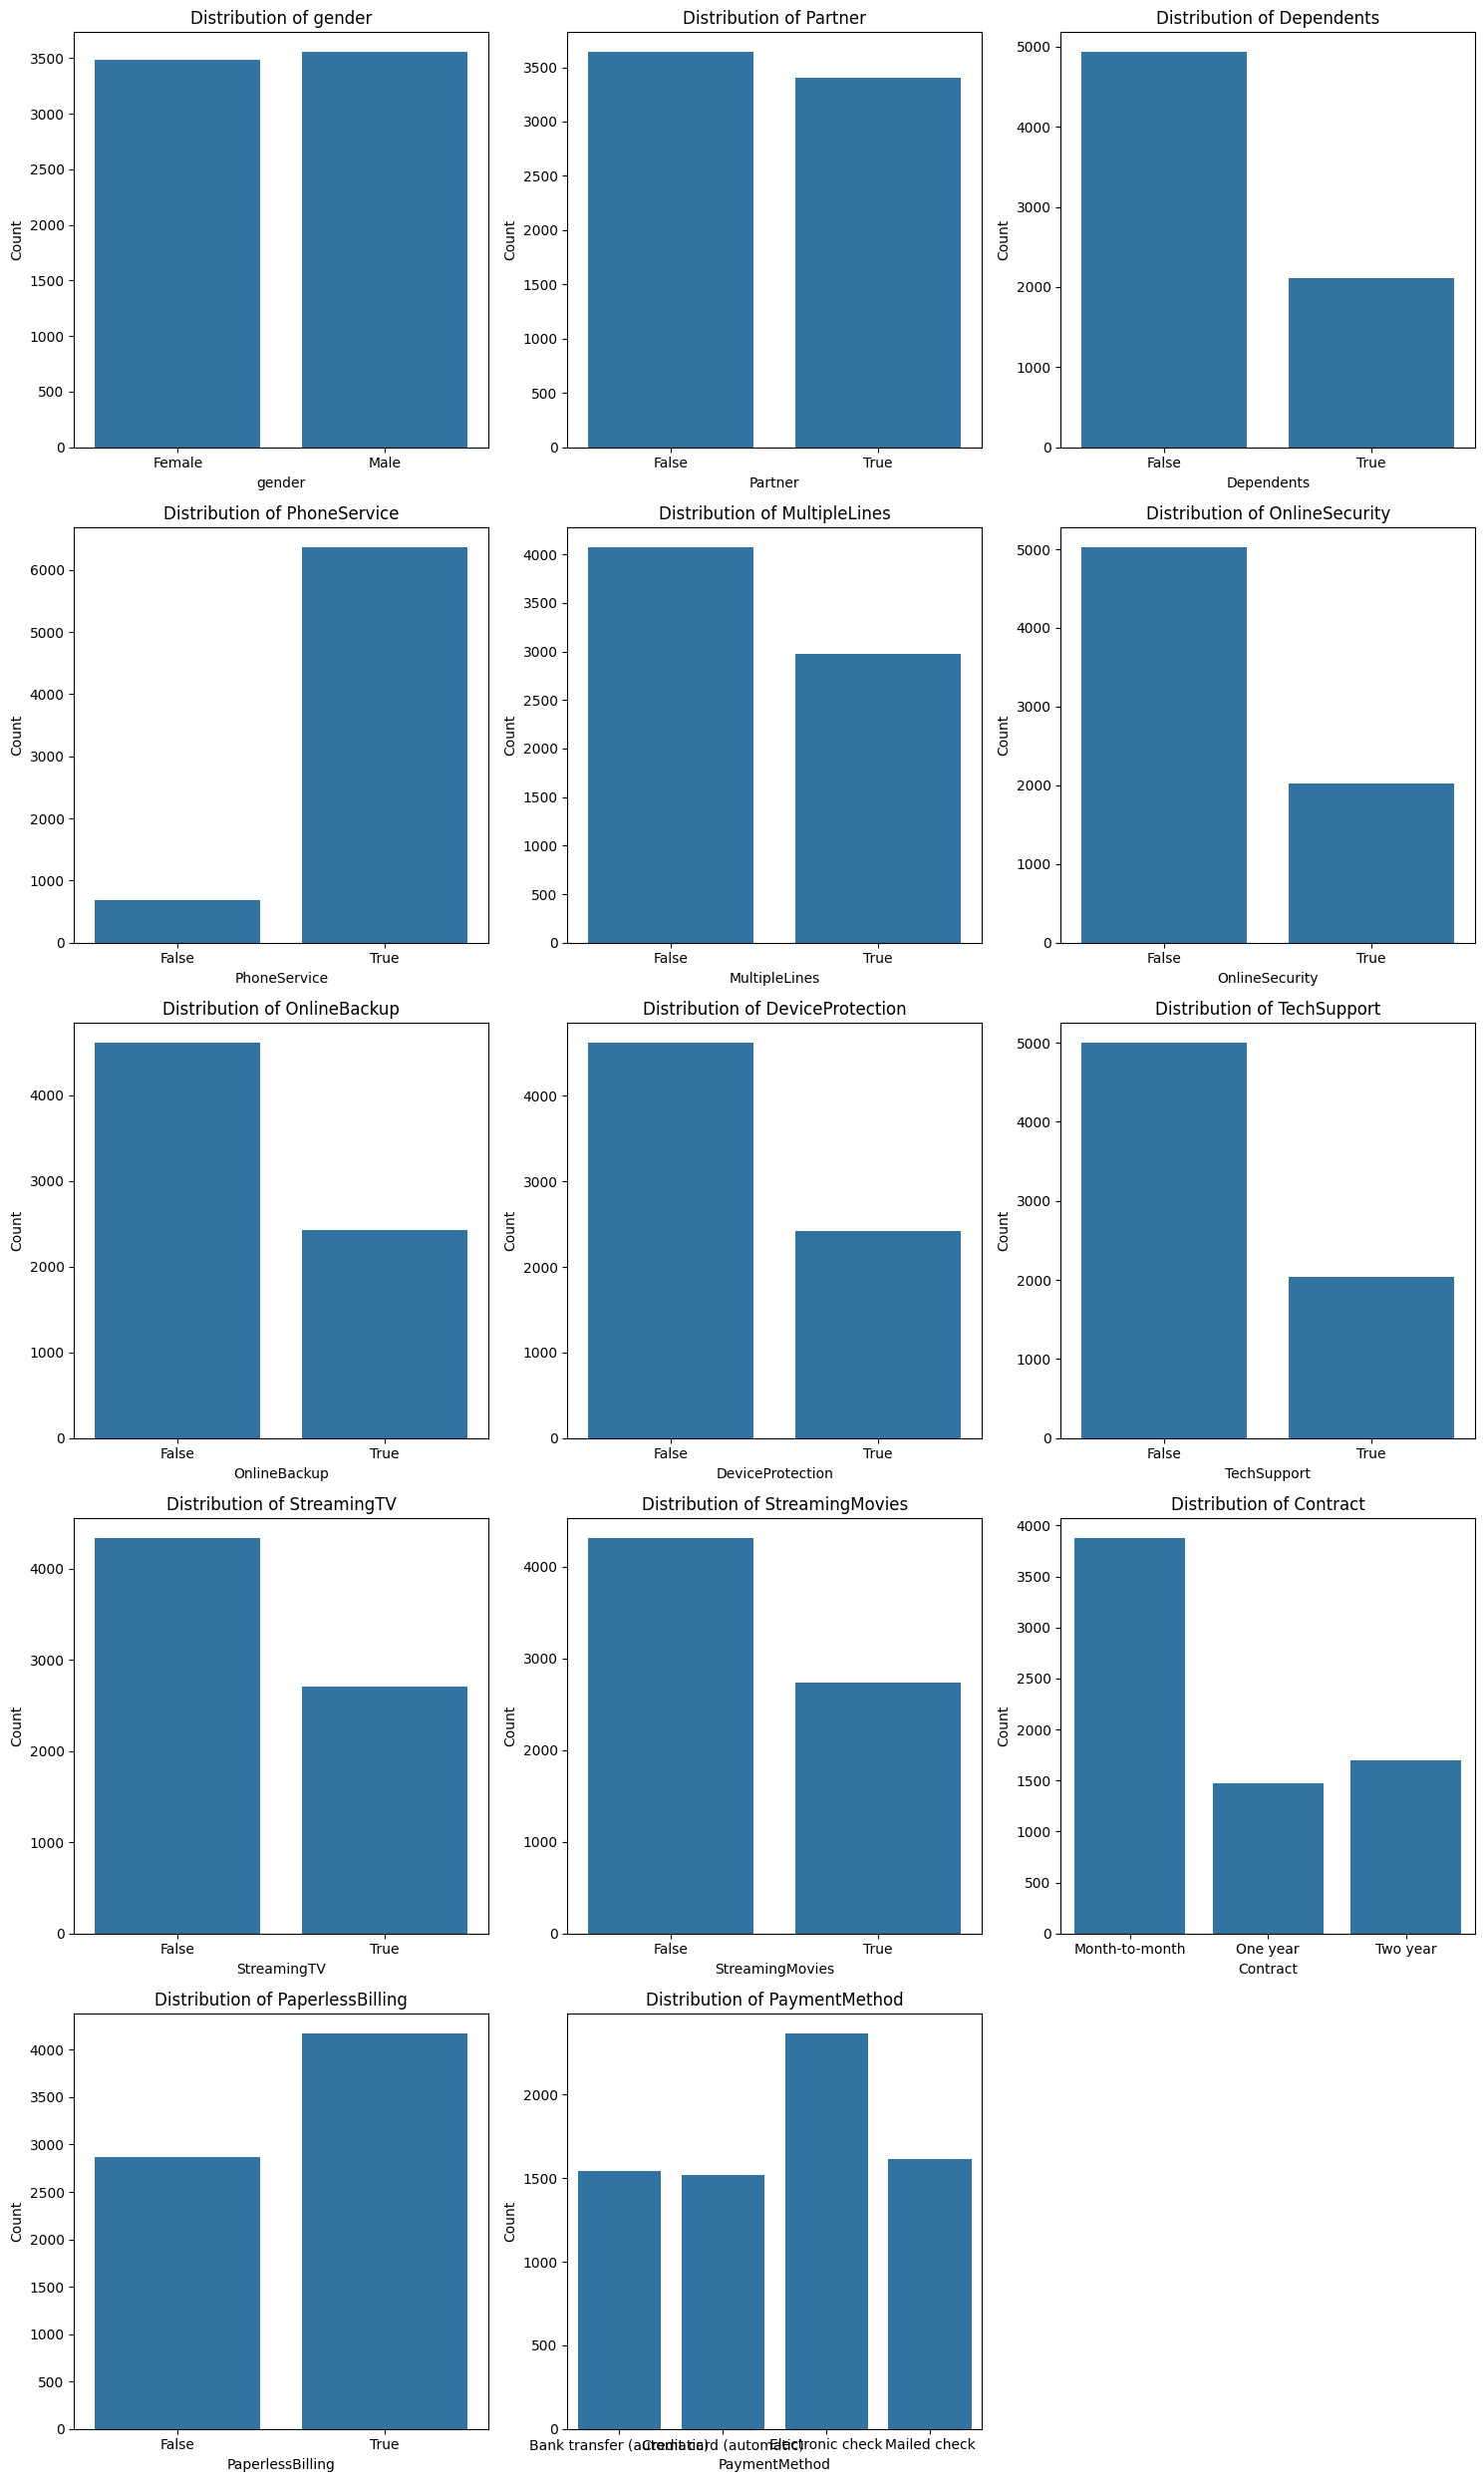

In [182]:
#bar plot for the categorical columns in combined_df
# A list of the categorical columns
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 
                       'PaymentMethod']

# Determining the number of rows and columns for the subplot grid
num_cols = 3
num_rows = -(-len(categorical_columns) // num_cols)  

# Creating a figure and a set of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

# Flattening the axes array for easy iteration
axes = axes.flatten()

# Looping through each categorical column and plotting its value counts
for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=combined_df, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Removing any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjusting layout to prevent overlap
plt.tight_layout()
plt.show()


#### Observations
Having already viewed the histogram of the other numerical columns, Total charges is the new addition after the dataset was cleaned. The distribution of Total Charges indicates that majority of people rack up charges at the very beginning of their dealing with the Telco company but there is a sharp decline and this downward trend persists to the very end meaning as charges build up, the number of customers paying those charges reduce.

### Bivariate Analysis

For the bivariate analysis, several types of analysis will be conducted: Numerical vs Numerical and Numerical vs Categorical. These analysis will be conducted using boxplots, correlation matrix and heatmaps.

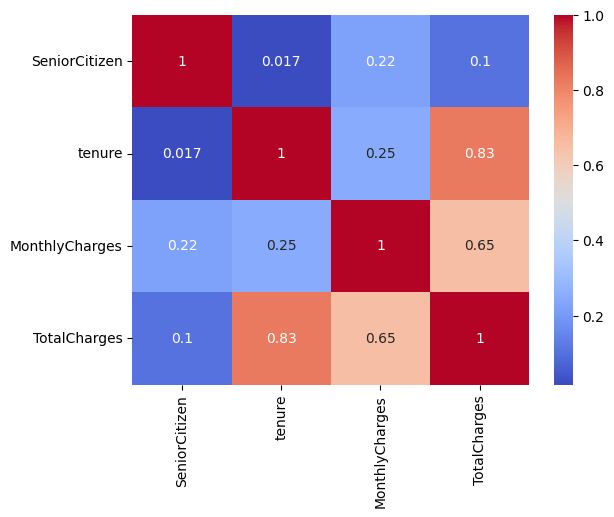

In [183]:
#List of numerical columns
numerical_df2= combined_df.select_dtypes(include= [np.number])

#correlation matrix for the numerical columns
corr_df2= numerical_df2.corr()
sns.heatmap(corr_df2, annot=True, cmap= 'coolwarm')
plt.show()

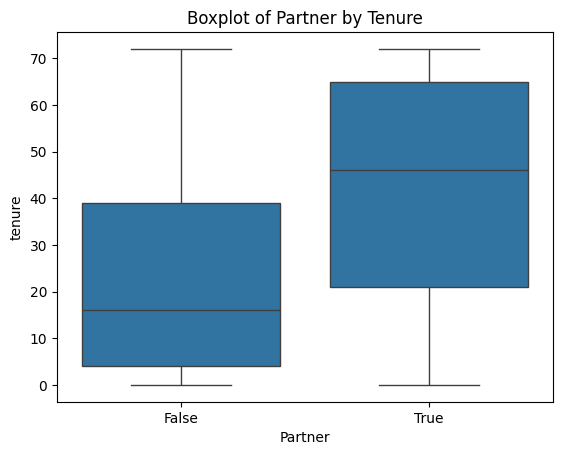

In [184]:
#boxplot for comparing partner and tenure
sns.boxplot(x= 'Partner', y= 'tenure', data= combined_df) 
plt.title('Boxplot of Partner by Tenure')
plt.show()

### Observations

#### Numerical vs Numerical
- The highest correlation was between tenure and total charges (0.83) followed by monthly charges and total charges (0.65). These were the only two correlation comparisms that had a value over 0.5. Additionally, the correlation between tenure and senior citizen had the lowest correlation score (0.017)
- It makes sense that the highest correlation was between tenure and total charges (0.83) since the longer a customer stays with the company, the higher the total charges they would accumulate. Additionally, the higher a customers monthly charge, it is directly relates to fast their total charges would rise; especially if the customer stays with the company for a long time.
- The lowest relation was between whether a customer was a senior citizen and their total charges suggesting suggesting a weak relationship between the two.

#### Numerical vs Categorical
- This was a boxplot between tenure and partner. The median for customers who have partners was higher than that of those who don't have partners. With the median tenure of customers with partners being higher than those without partners, it suggests that customers with partners tend to stay with the company longer than customers without partners. This could be that customers with partners will tend to communicate more (by calling their partner) and would be more financially stable (with a combined household income)


### Hypothesis Testing

In [185]:
#creating a dataframe without the missing churn values
df1_df2= combined_df.copy()
df1_df2= df1_df2.dropna(subset= ['Churn'])
train_df= df1_df2.copy()


# Encode categorical columns
label_encoders = {}
for column in df1_df2.select_dtypes(include=['category']).columns:
    label_encoders[column] = LabelEncoder()
    df1_df2[column] = label_encoders[column].fit_transform(df1_df2[column])

# Ensure 'Churn' is numeric
df1_df2['Churn'] = df1_df2['Churn'].replace({True: 1, False: 0})

# Define threshold
threshold = 0.05

# Perform ANOVA for each factor
factors = ['Contract', 'MonthlyCharges', 'tenure', 'Dependents', 'Partner', 'PhoneService', 
           'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
           'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen', 
           'gender', 'InternetService', 'TotalCharges']

p_values = {}

for factor in factors:
    formula = f'Churn ~ Q("{factor}")'
    model = ols(formula, data=df1_df2).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    p_value = anova_table['PR(>F)'][0]
    p_value_decimal = round(float(p_value), 2)
    print(f'P-value for {factor}: {p_value_decimal}')
    p_values[factor] = p_value_decimal

# Compare p_values for significant factors
significant_factors = [factor for factor, p_value in p_values.items() if p_value < threshold]
print(f'Significant factors with p-values below {threshold}: {significant_factors}')

# Compare p_values for statistically not insignificant factors
insignificant_factors = [factor for factor, p_value in p_values.items() if p_value > threshold]
print(f'Not statistically significant factors with p-values above {threshold}: {insignificant_factors}')



P-value for Contract: 0.0
P-value for MonthlyCharges: 0.0
P-value for tenure: 0.0
P-value for Dependents: 0.0
P-value for Partner: 0.0
P-value for PhoneService: 0.3
P-value for MultipleLines: 0.0
P-value for OnlineSecurity: 0.0
P-value for OnlineBackup: 0.0
P-value for DeviceProtection: 0.0
P-value for TechSupport: 0.0
P-value for StreamingTV: 0.0
P-value for StreamingMovies: 0.0
P-value for PaperlessBilling: 0.0
P-value for PaymentMethod: 0.0
P-value for SeniorCitizen: 0.0
P-value for gender: 0.86
P-value for InternetService: 0.0
P-value for TotalCharges: 0.0
Significant factors with p-values below 0.05: ['Contract', 'MonthlyCharges', 'tenure', 'Dependents', 'Partner', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen', 'InternetService', 'TotalCharges']
Not statistically significant factors with p-values above 0.05: ['PhoneService', 'gender']


- Significant Factors:
Contract, MonthlyCharges, tenure, Dependents, Partner, MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod, SeniorCitizen, InternetService, TotalCharges are associated with different churn rates when there are variations in these factors.

- This suggests that we focus on optimizing marketing/sales strategies around the significant factors, as these have a substantial impact on the customer churn.

- With factors like phone service and gender not being statistically significant, it indicates that resources should be focused on these areas as variations in these do no play a significant role in affecting customer churn.


### Answering Business Analytical Questions

1. What are the primary factors influencing customer churn in the telecommunications industry?

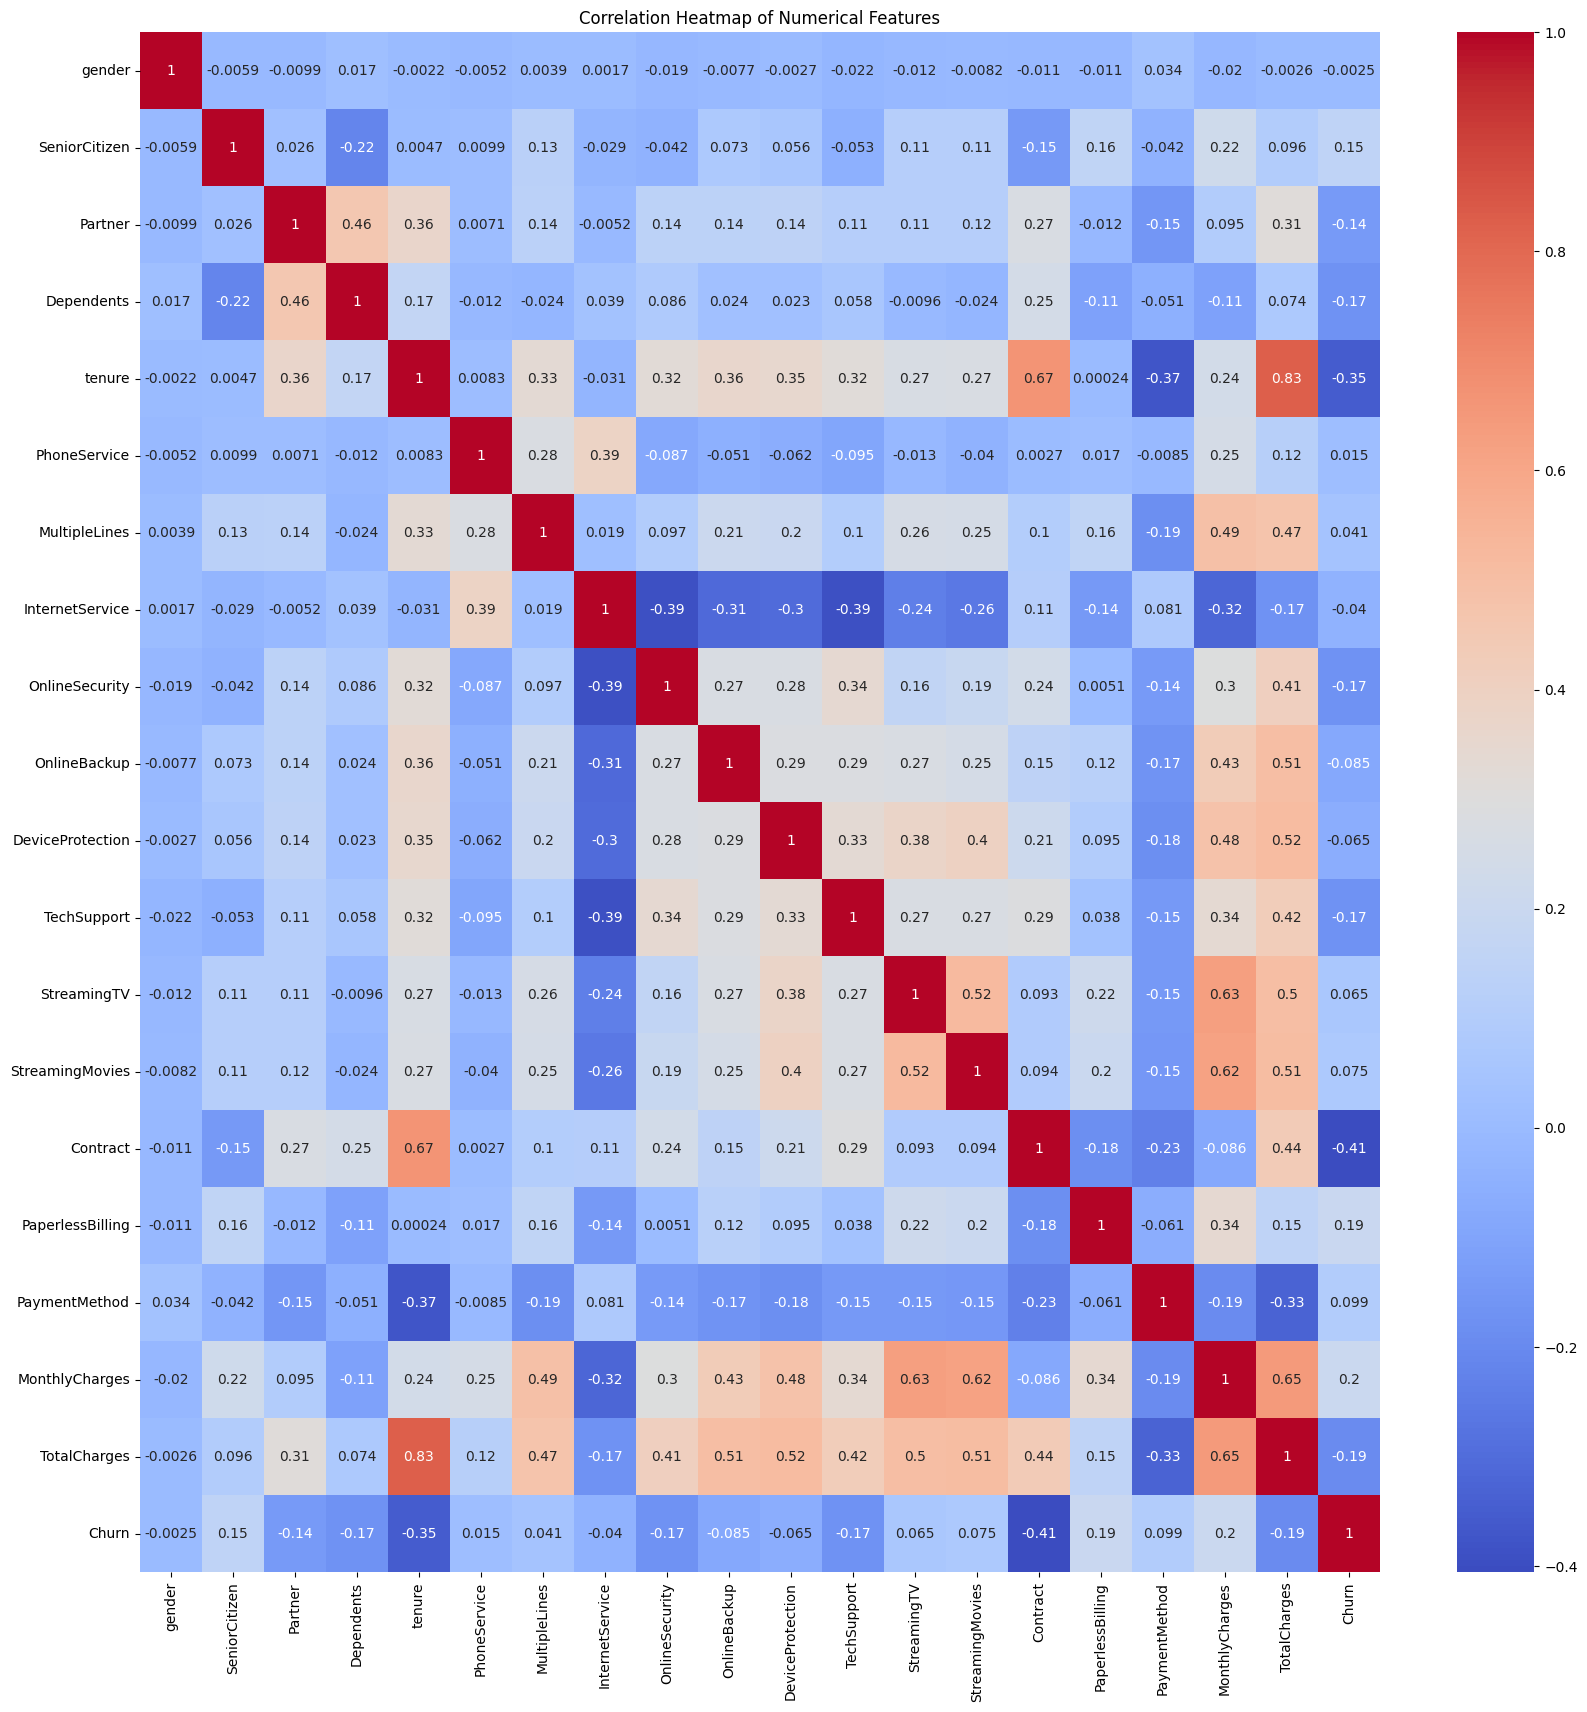

In [186]:
#filtering out columns not currently needed (label, customerID)
filtered_df = df1_df2.copy()
filtered_df = filtered_df.drop(columns=['label', 'customerID'])

#selecting numerical columns
numfiltered= filtered_df.select_dtypes(include= [np.number])
# Correlation heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(numfiltered.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


- Observing just the values for the churn correlation at the bottom of the chart, you would observe that the highest correlations were Monthly charges (0.2) and paperless billing (0.19) whilst the lowest correlation values were contract (-0.41) and tenure (-0.35)
- With contract and tenure being negative correlations, it means that as one increases, the other decreases. 
- In this case, the longer a customer stays with the company(tenure), the less likely that customer is to churn. 
- Additionally, the smaller the contract (month to month), the more likely a customer is to churn (1) since they are free to join any other telco once their contract expires. However, customers signed on to the longer contracts (1 year and 2 years) are less likely to churn as they are tied to longer periods and would likely have to pay a penalty for termination

2. How does contract type affect the likelihood of customer churn?


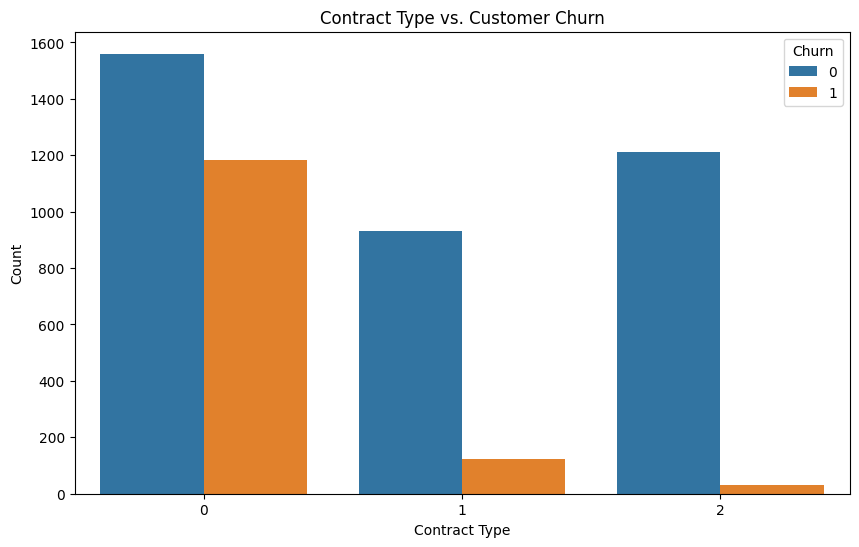

In [187]:
# Countplot for contract types and churn
plt.figure(figsize=(10, 6))
sns.countplot(data=df1_df2, x='Contract', hue='Churn')
plt.title('Contract Type vs. Customer Churn')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()


- Observing the decline of the orange bars representing customers who churn, you can confirm that the longer the contract type, the lower the incidence of customer churn.
- This is likely because being tied to a longer contract would prevent you from switching to a different telco that may pop up with enticing offers. Also, one might have to pay a termination fee/or would lose the value of the long term contract they paid for if they decided to churn before the expiration of the contract leading them to stick with their current telco provide.

3. How does tenure affect customer churn?

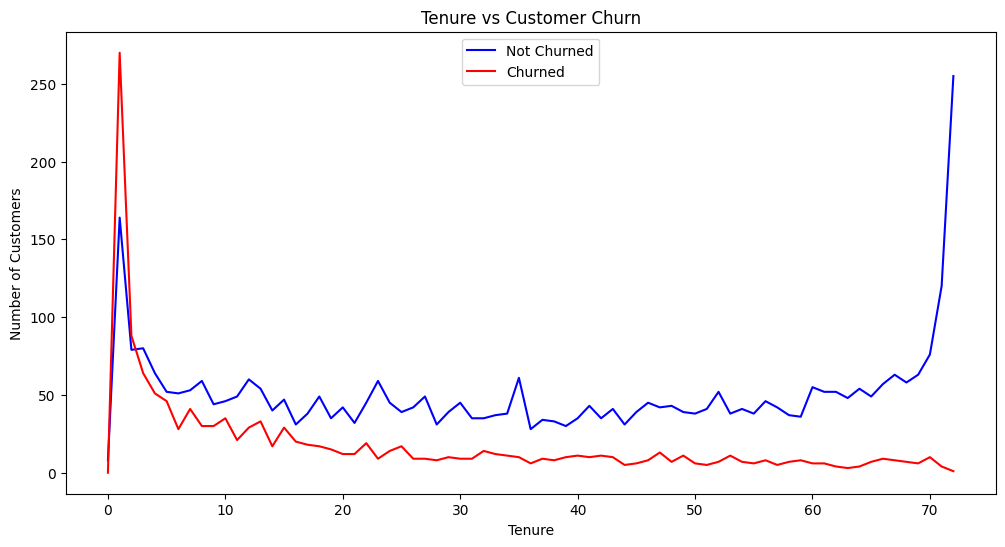

In [188]:

# Group by 'tenure' and 'Churn' and count the occurrences
tenure_churn = combined_df.groupby(['tenure', 'Churn']).size().unstack()

# Plot the data
plt.figure(figsize=(12, 6))

# Plot the lines
plt.plot(tenure_churn.index, tenure_churn[False], label='Not Churned', color='blue')
plt.plot(tenure_churn.index, tenure_churn[True], label='Churned', color='red')

# Adding labels and title
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.title('Tenure vs Customer Churn')
plt.legend()

# Show the plot
plt.show()

- It can be observed that at the early stages (smaller tenure), the gap between churned and not churned was not that great. However as tenure increased, the gap kept widening especially toward the end. This suggests that as tenure increased, the rate of churn (red) decreased and the rate of customers not churning/staying loyal (blue) increased.
- This could be because as time goes on and a customer remains with a particular provider, they get comfortable and reluctant to switching as compared with newer customers who have not formed any loyalty or association to any particular provider and can easily drop or switch providers.

4. How do demographic factors (partners, senior citizen, dependents) impact customer churn?

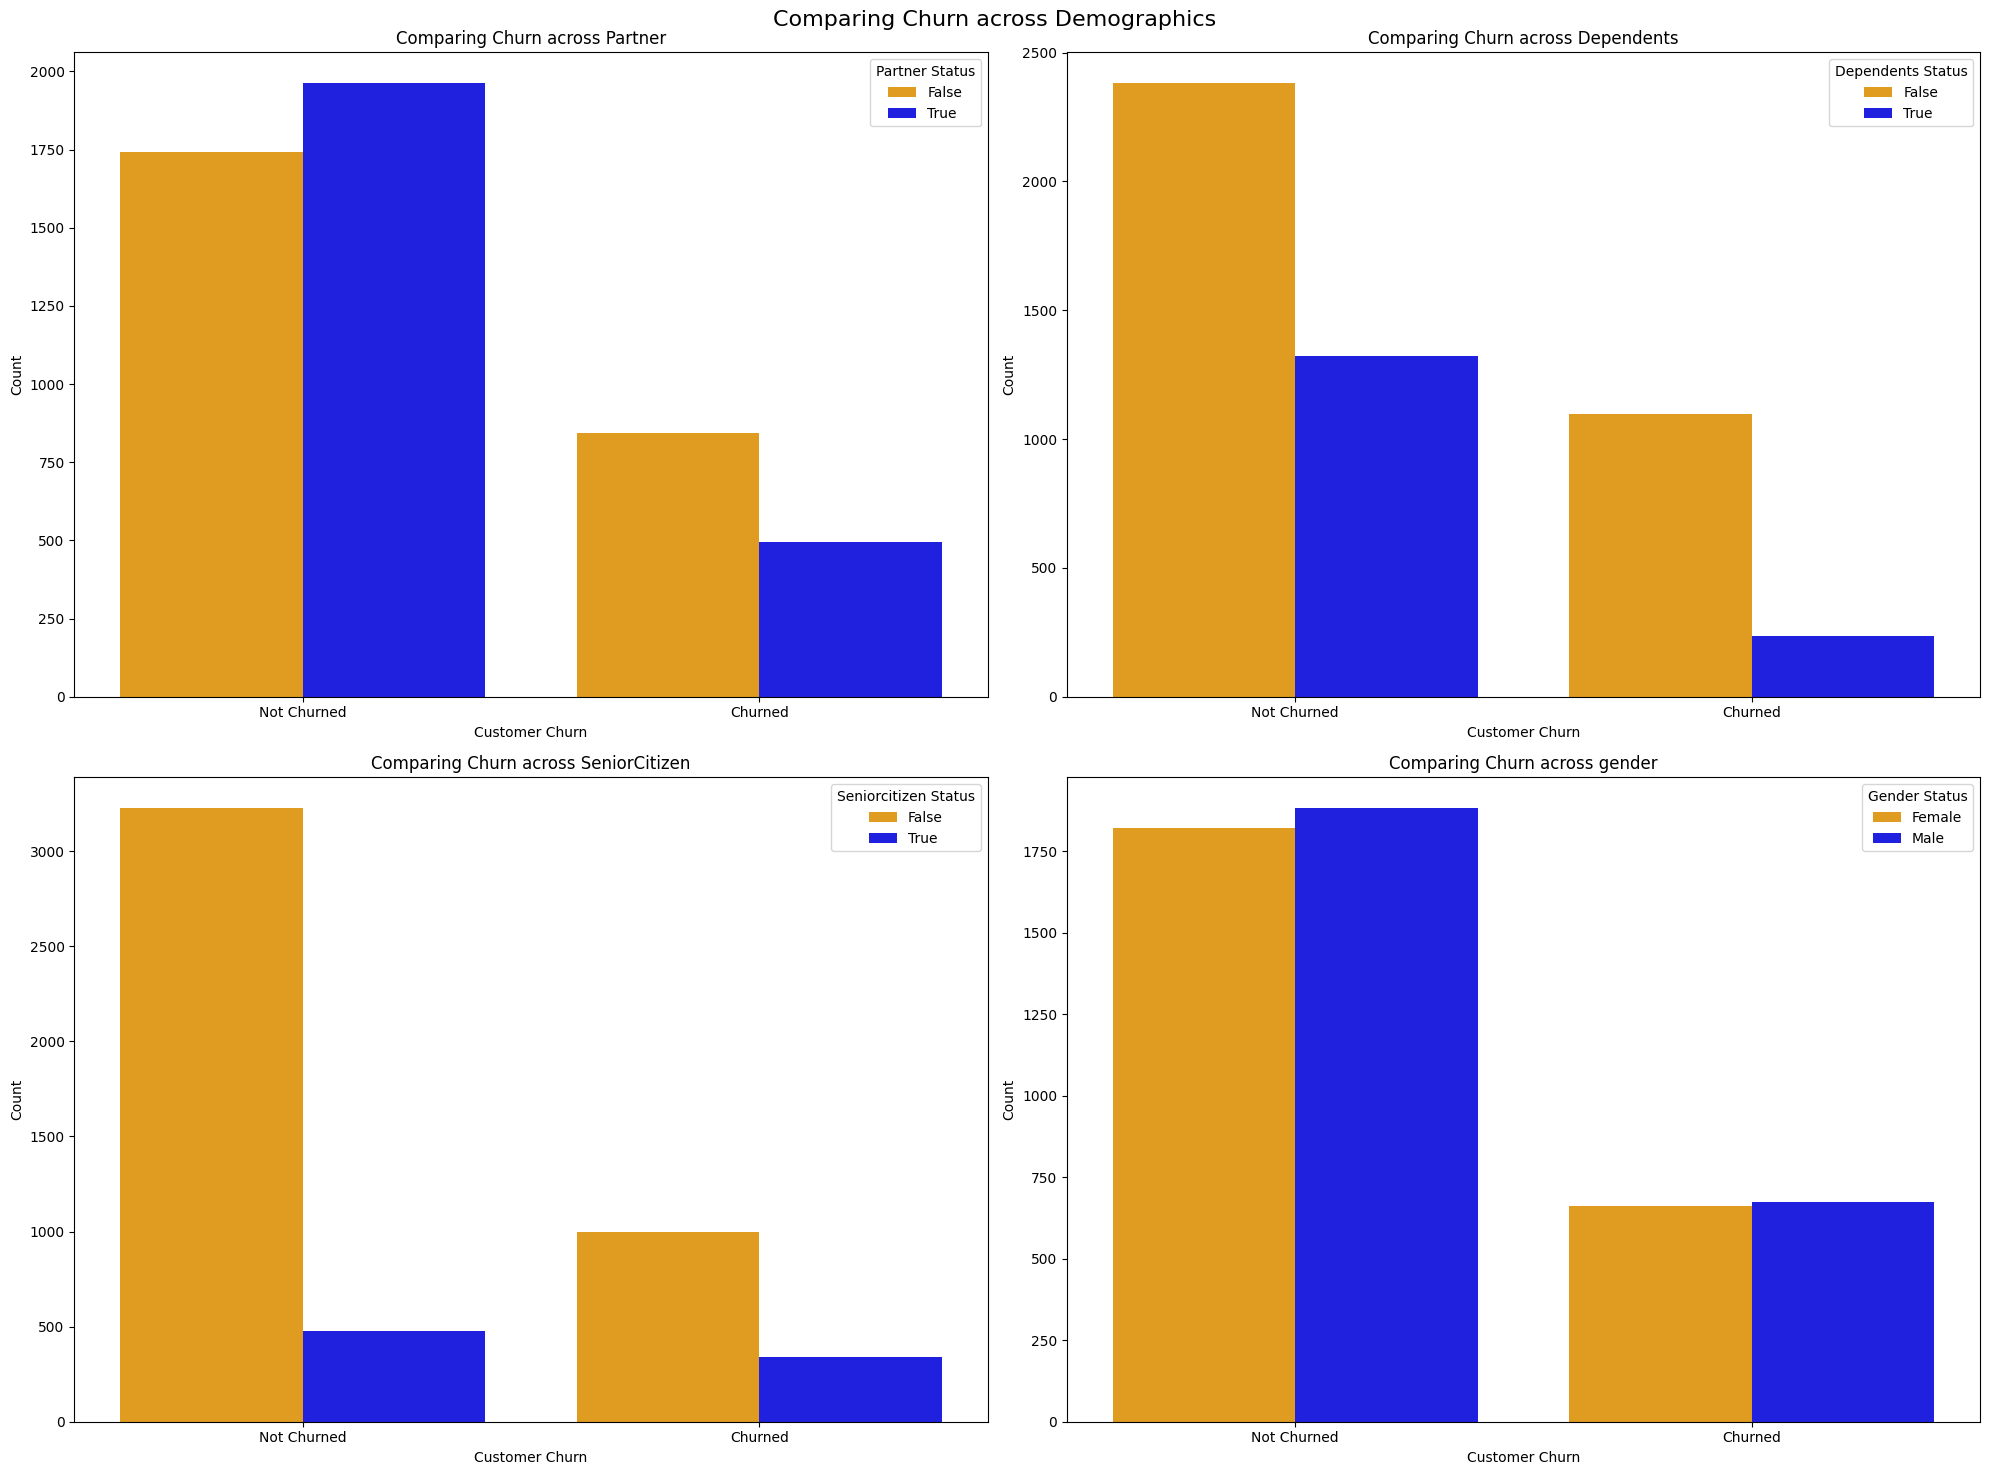

In [189]:

# A list of the demographics  to analyze
demographics = ['Partner', 'Dependents', 'SeniorCitizen', 'gender']
custom_palette = ['orange', 'blue']  # Define a custom palette

# Setting up subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
fig.suptitle('Comparing Churn across Demographics', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through each demographic and create count plots
for i, demographic in enumerate(demographics):
    # Create the count plot
    ax = sns.countplot(data=df1_df2, x='Churn', hue=demographic, palette=custom_palette, ax=axes[i])
    
    # Set labels and title for each subplot
    ax.set_xlabel('Customer Churn')
    ax.set_ylabel('Count')
    ax.set_title(f'Comparing Churn across {demographic}')

    
        # Customizing the legend based on demographic
    if demographic == 'gender':
        new_labels = ['Female', 'Male']
    else:
        new_labels =  ['False', 'True']   # Use unique values for other demographics
        
    handles, _ = ax.get_legend_handles_labels()
    ax.legend(handles, new_labels, title=f'{demographic.capitalize()} Status', loc='upper right')

    # Customizing the x-tick labels
    ax.set_xticklabels(['Not Churned', 'Churned'])
    
# Adjust layout and show plot
plt.tight_layout()
plt.show()


- As demonstrated by the hypothesis testing, gender has no significant effect on customer churn. As seen in the graph at the bottom right, both churned and not churned bars are pretty much the same size for both gender with that of male being slightly for either churned or not churned.
- Similarly, the senior citizen status has no unique bearing on churn as the count of senior citizens (blue) was lower both for customers who churned and those that did not. 
- When you compare the bar size for each demographic status that did churn, dependents (blue) had the smallest proportion. For example, if you compare the churned bars (True and False) for gender, they are roughly the same size but dependents had the smallest relative size (blue). This indicates for the customers that churned, those who had dependents were the smallest demographic portion. This could be that the customer would have more people to call as well as more responsibilities to handle which may involve calls to teachers, co-parents, caretakers, and may result in maintaining the same provider for simplicity and convenience sake etc
- It can be observed that for customers that did not churn, those with partners were more than those without partners. This makes sense as customers with partners are much more stable financially and make prefer to be on the same provider/telco as their partner which reduces the incidence of churn

5. What is the impact of monthly charges and total charges on the likelihood of a customer churning?

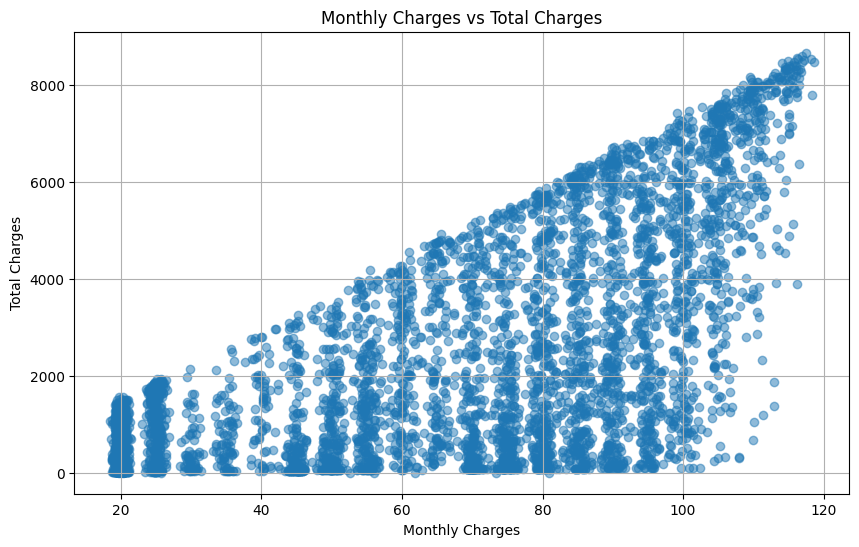

In [190]:
plt.figure(figsize=(10, 6))
plt.scatter(df1_df2['MonthlyCharges'], df1_df2['TotalCharges'], alpha=0.5)
plt.title('Monthly Charges vs Total Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.grid(True)
plt.show()



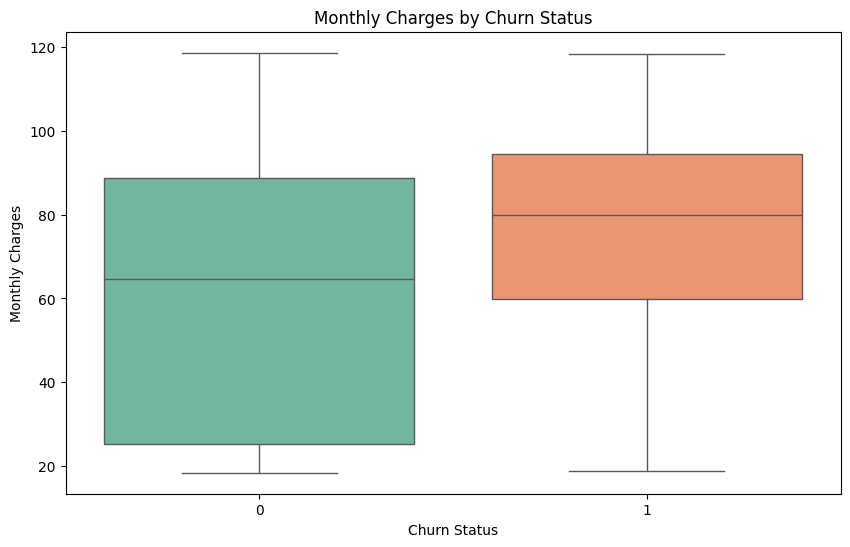

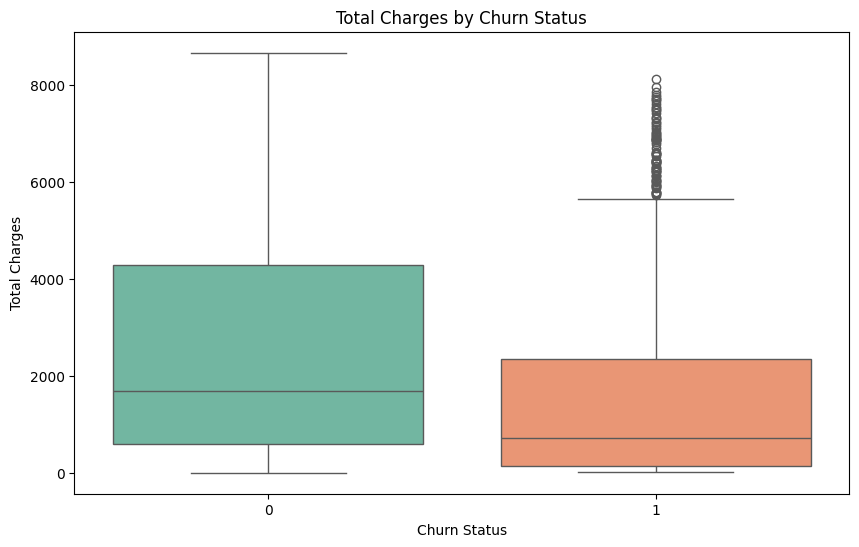

In [192]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1_df2, x='Churn', y='MonthlyCharges', palette='Set2')
plt.title('Monthly Charges by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Monthly Charges')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df1_df2, x='Churn', y='TotalCharges', palette='Set2')
plt.title('Total Charges by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Total Charges')
plt.show()


- There is a positive linear relationship between monthly charges and total charges. This is very intuitive as the higher the monthly charges, the higher the total charges you would accumulate the longer you remain with the telco provider.
- it can also be observed that the higher the monthly charge, the more people are likely to churn.
- However the total charges has a different output where those who did not churn had a higher total charge than those who churned.
- Although at first glance it seems counter intuitive, this actually makes sense because customers that do not stay long (tenure) especially because of a high monthly, would most likely churn. On the other hand customers that are loyal would end up racking a higher total charge because they continue to use the telco provider and their total charges would be higher than their counterparts who churned.


## Data Preparation

### Split Dataset and Create Pipelines

In [240]:
#importing necessary libraries and packages
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, RobustScaler, StandardScaler 
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline as imbPipeline

In [199]:
#dropping columns not needed for training
train_df= train_data_df.copy()
train_df2 = train_df.drop(columns= ['customerID', 'label'], axis=1)

#converting the columns into numerical formats
bool_columns= ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in bool_columns:
    train_df2[col]= train_df2[col].astype(int)

# Display the updated data types to confirm changes
print(train_df2.dtypes)

gender              category
SeniorCitizen          int32
Partner                int32
Dependents             int32
tenure                 int64
PhoneService           int32
MultipleLines          int32
InternetService     category
OnlineSecurity         int32
OnlineBackup           int32
DeviceProtection       int32
TechSupport            int32
StreamingTV            int32
StreamingMovies        int32
Contract            category
PaperlessBilling       int32
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn                  int32
dtype: object


In [212]:
# Perform one-hot encoding on categorical columns
categorical_columns = ['InternetService', 'Contract', 'PaymentMethod', 'gender']

#splitting data into x and y
x = train_df2.drop(columns= ['Churn'])
y= train_df2['Churn']

#splitting data into training and evaluation sets
x_train, x_eval, y_train, y_eval = train_test_split(x, y, test_size= 0.2, stratify=y, random_state=42)
(x_train.shape, y_train.shape), (x_eval.shape, y_eval.shape)

(((4033, 19), (4033,)), ((1009, 19), (1009,)))

In [214]:
#splitting x into numerical and categorical columns
x_num = x.select_dtypes('number').columns
x_cat= x.select_dtypes(['object', 'category', 'bool']).columns

print('X has been split into numerical and categorical columns')
print(f'The numerical columns of x are {len(x_num)} in total')
print(f'The categorical columns of x are {len(x_cat)} in total')

X has been split into numerical and categorical columns
The numerical columns of x are 15 in total
The categorical columns of x are 4 in total


In [215]:
# encoding y_train and y_eval with label encoder
le= LabelEncoder()

y_train_encoded= le.fit_transform(y_train)
y_eval_encoded= le.transform(y_eval)

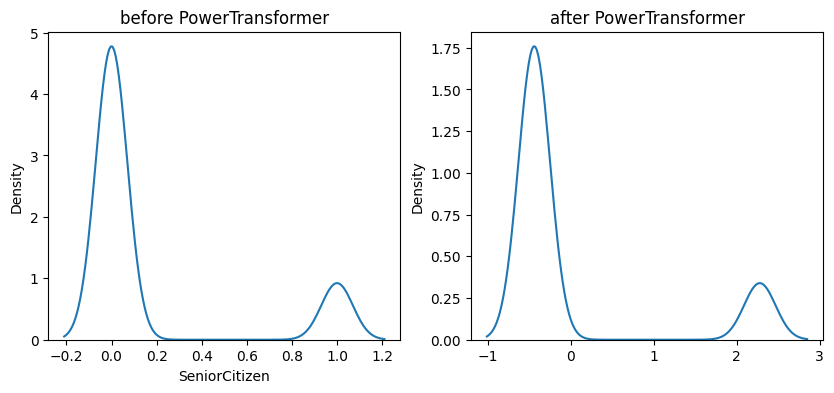

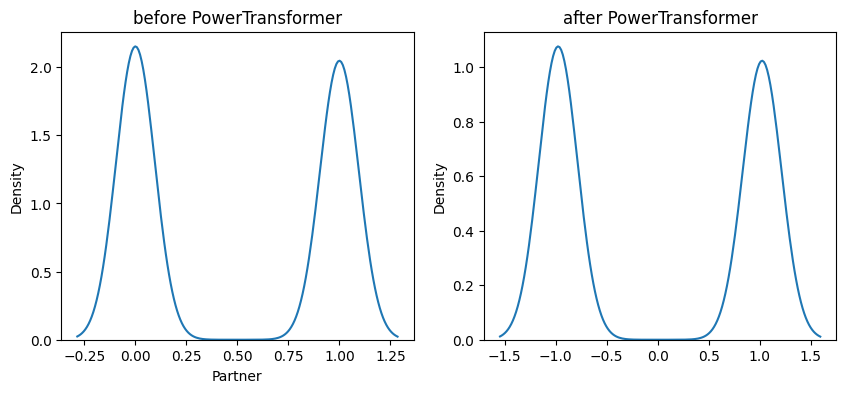

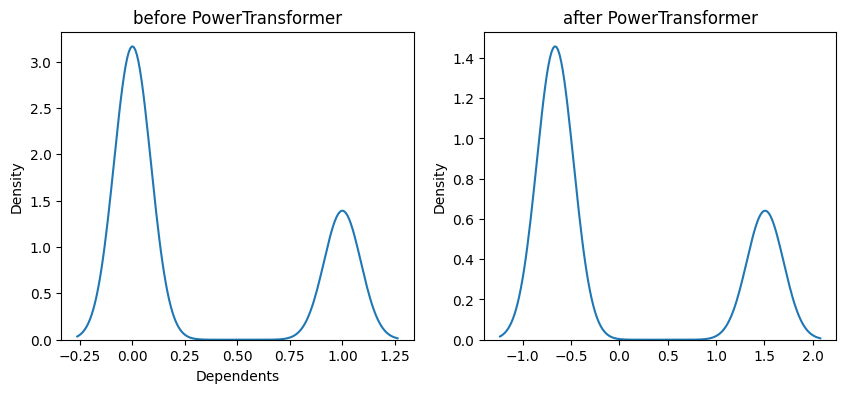

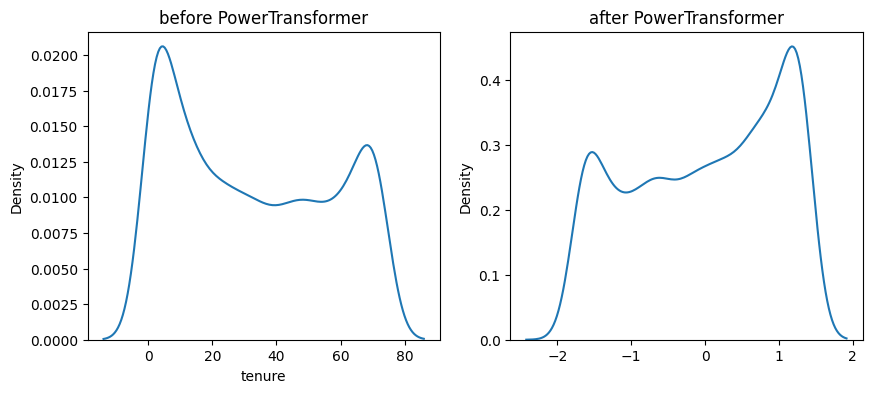

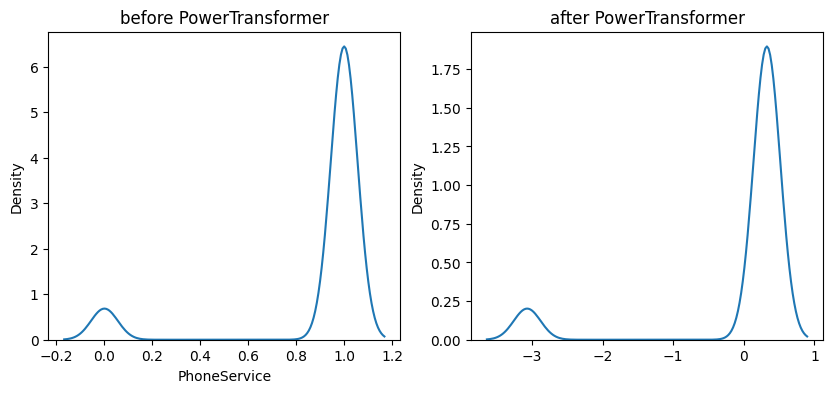

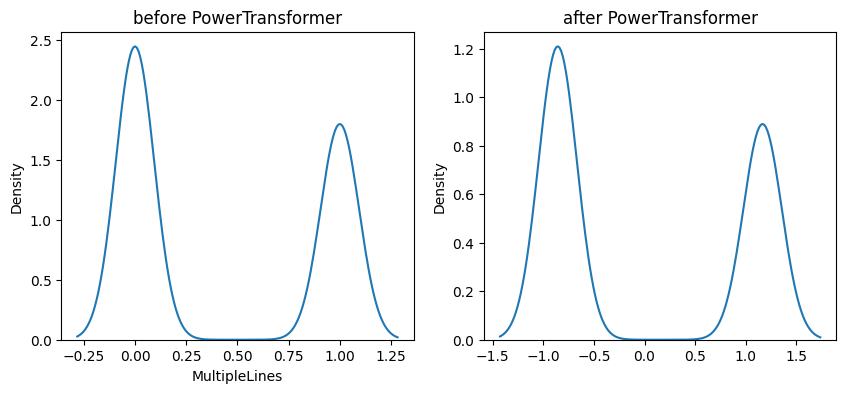

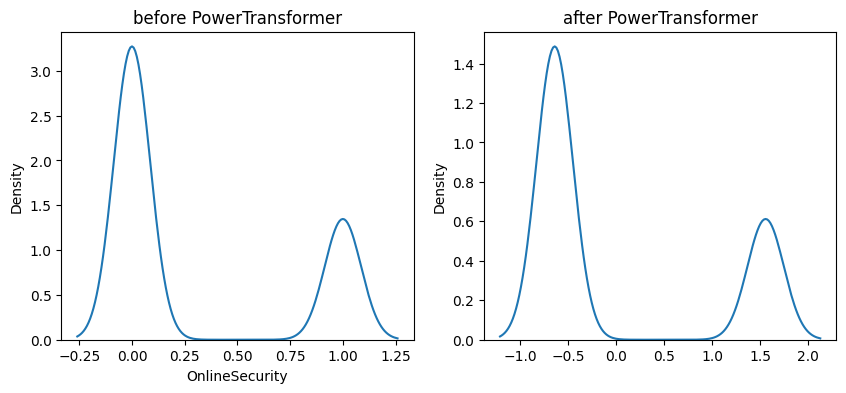

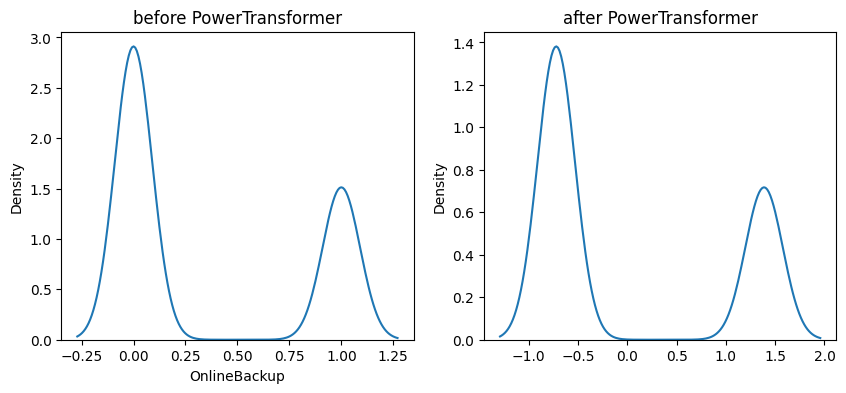

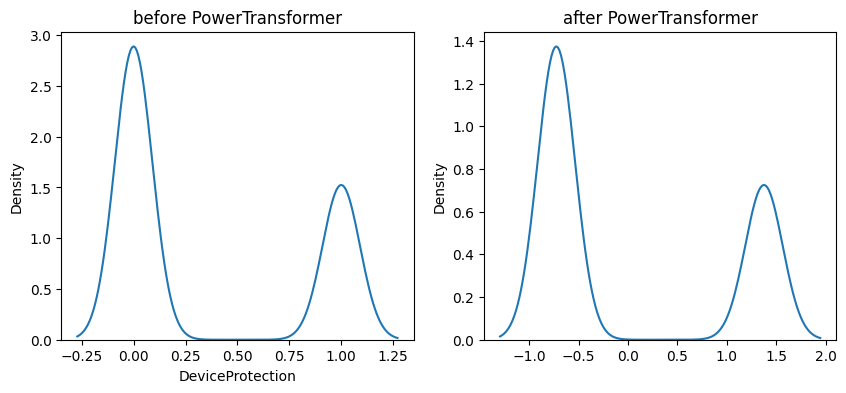

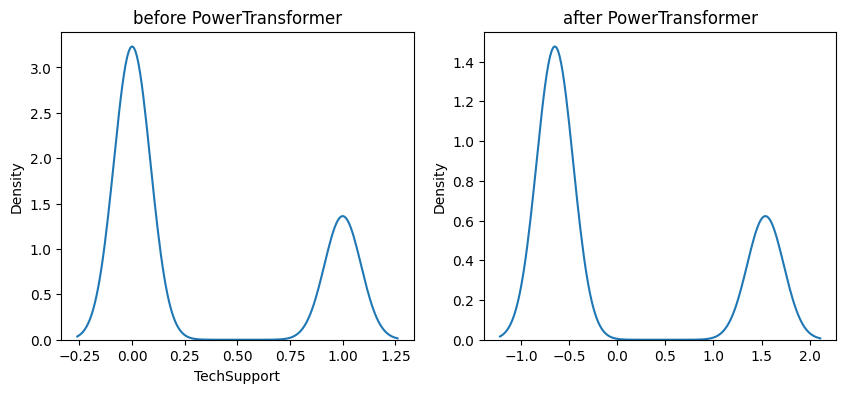

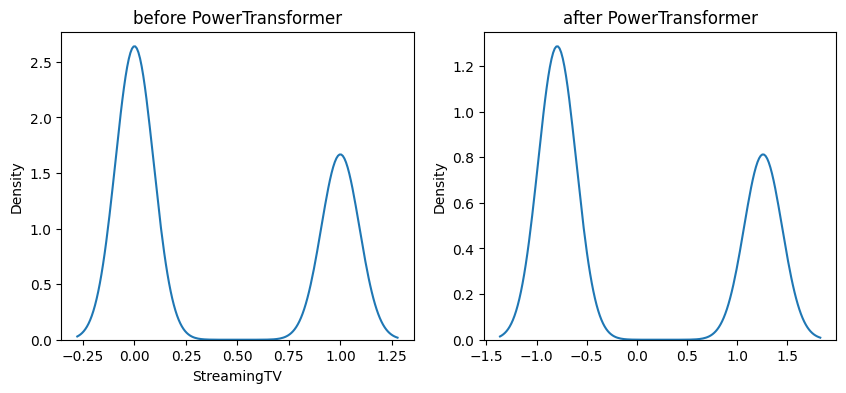

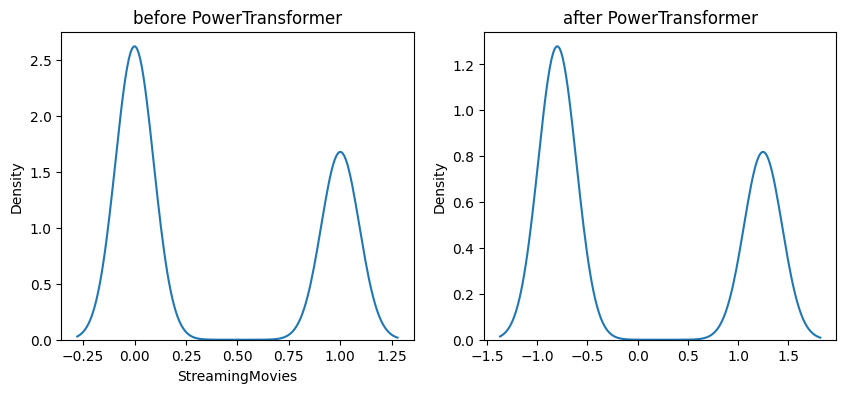

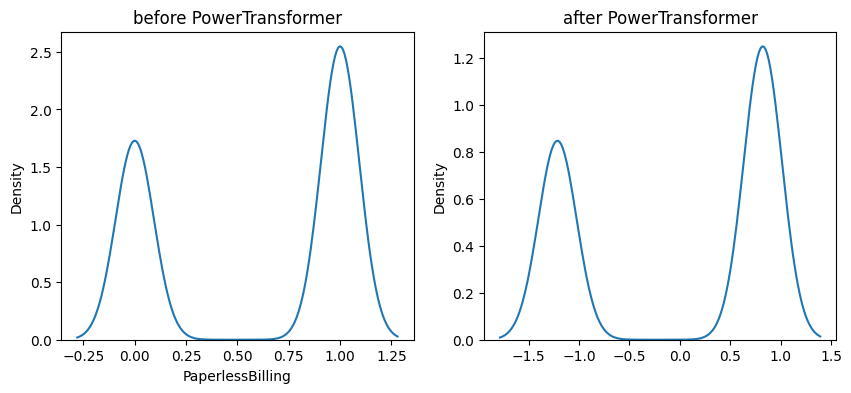

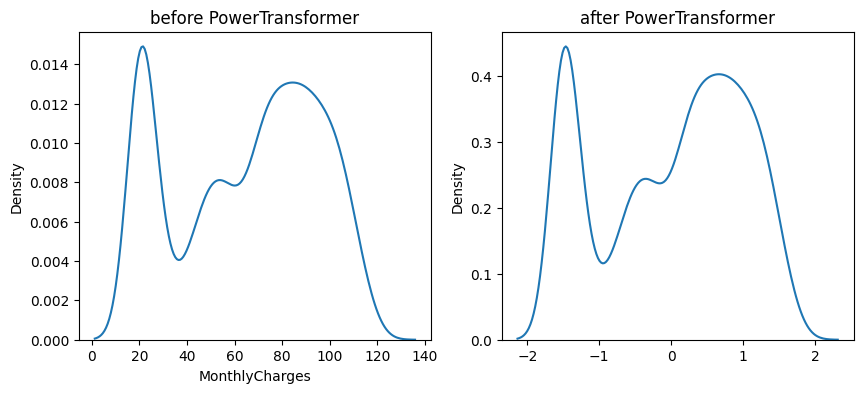

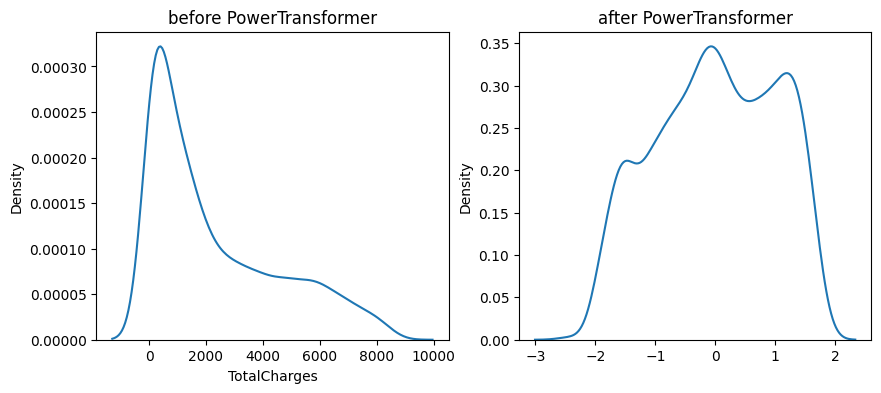

In [216]:
def plots(df, var, t):
    plt.figure(figsize=(10, 4)) 
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('before ' +str(t).split('(')[0])
    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten() 
    sns.kdeplot(p1)
    plt.title('after ' +str(t).split('(')[0])

for col in x.select_dtypes('number').columns:
    plots(x_train, col, PowerTransformer(method='yeo-johnson'))

### Create Pipeline

In [217]:
numeric_pipeline= Pipeline(steps=[
('num_impute', SimpleImputer(strategy='median')),
('scalar', RobustScaler()),
('power-transformer', PowerTransformer(method='yeo-johnson'))
])
categorical_pipeline= Pipeline(steps=[
('cat_impute', SimpleImputer(strategy= 'most_frequent')), ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor= ColumnTransformer(transformers=[
('num_pipeline', numeric_pipeline, x_num), ('cat_pipeline', categorical_pipeline, x_cat)
])

In [218]:
# observing the distribution of the y_train before balancing
print('Before balancing')
before_count= y_train.value_counts()
percentage_count= (before_count/before_count.sum()) * 100

for label, count in before_count.items():
    print(f' {label}: {count} ({percentage_count[label]:.2f}%)')

Before balancing
 0: 2964 (73.49%)
 1: 1069 (26.51%)


## Modeling and Evaluation

Key Insights
- The models with unbalanced data produced a much better performance 
- SVC with the unbalanced data was the best algorithm 
- The ROC curve is the same for the balanced and unbalanced data

### Unbalanced Data

In [226]:
# Define a list of models to evaluate
models = [
    ('Decision Tree', DecisionTreeClassifier(random_state=42)), 
    ('SVC', SVC(random_state=42, probability=True)),
    ('Random Forest', RandomForestClassifier(random_state=42)), 
    ('Logistic Regression', LogisticRegression(random_state=42)), 
    ('KNN', KNeighborsClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)), 
    ('XGBoost', XGBClassifier(random_state=42))
]

# Initialize an empty DataFrame to store the evaluation metrics
unbalanced_table = pd.DataFrame(columns=['Models', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])

# Initialize an empty dictionary to store the pipelines
unbalanced_pipeline = {}

# Loop through each model and evaluate
for model_name, classifier in models:
    # Create a pipeline with preprocessing and the classifier
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    
    # Fit the pipeline on the training data
    pipeline.fit(x_train, y_train_encoded)
    
    # Predict on the evaluation data
    y_pred = pipeline.predict(x_eval)
    
    # Get classification report as a dictionary
    unbalanced_metrics = classification_report(y_eval_encoded, y_pred, output_dict=True)
    
    # Extract required metrics
    accuracy = unbalanced_metrics['accuracy']
    precision = unbalanced_metrics['weighted avg']['precision']
    recall = unbalanced_metrics['weighted avg']['recall']
    f1 = unbalanced_metrics['weighted avg']['f1-score']
    
    # Append metrics to the DataFrame
    unbalanced_table.loc[len(unbalanced_table)] = [model_name, accuracy, precision, recall, f1]
    
    # Store the pipeline in the dictionary
    unbalanced_pipeline[model_name] = pipeline

# Sort the DataFrame by F1_Score in descending order
unbalanced_table.sort_values(by="F1_Score", ascending=False, inplace=True)

# Display the sorted DataFrame
unbalanced_table


,Models,Accuracy,Precision,Recall,F1_Score
1,SVC,0.804757,0.794906,0.804757,0.796703
3,Logistic Regression,0.799802,0.793480,0.799802,0.795827
5,Gradient Boosting,0.798811,0.791910,0.798811,0.794373
2,Random Forest,0.795837,0.787251,0.795837,0.789933
4,KNN,0.777998,0.775918,0.777998,0.776905
6,XGBoost,0.778989,0.774711,0.778989,0.776607
0,Decision Tree,0.724480,0.733313,0.724480,0.728419


Models with the highest F1-scores
- SVC (0.797)
- Logistic Regression (0.796)

### Confusion matrix for the SVC model

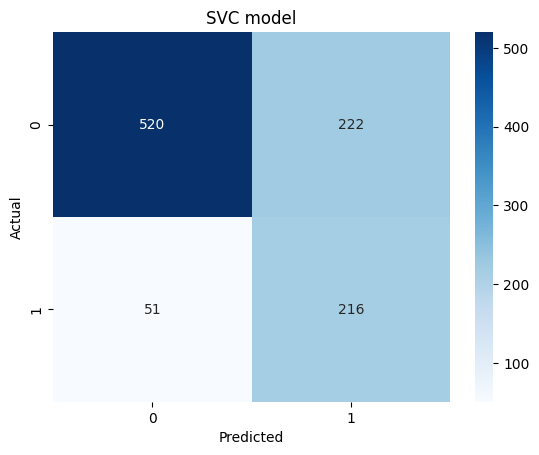

              precision    recall  f1-score   support

           0       0.91      0.70      0.79       742
           1       0.49      0.81      0.61       267

    accuracy                           0.73      1009
   macro avg       0.70      0.75      0.70      1009
weighted avg       0.80      0.73      0.74      1009



In [230]:
# Predictions using the SVC regression model
svc_mod = unbalanced_pipeline['SVC'] 
# Calculate the confusion matrix
y_pred_log1 = svc_mod.predict(x_eval) 
sm = confusion_matrix(y_eval_encoded, y_pred_log1)
# Plotting the confusion matrix
sns.heatmap(sm, annot=True, fmt='d', cmap='Blues') 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVC model')
plt.show()
# Calculate the classification report
report_logistics = classification_report(y_eval_encoded, y_pred_log1) 
print(report_logistics)

### Balanced Data (SMOTE)

In [227]:
# Initialize an empty DataFrame to store the evaluation metrics
balanced_table = pd.DataFrame(columns=['Models', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])

# Initialize an empty dictionary to store the pipelines
balanced_pipeline = {}

# Loop through each model and evaluate
for model_name, classifier in models:
    # Create a pipeline with preprocessing and the classifier
    pipeline = imbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('over-sampler', SMOTE(random_state=42)),
        ('classifier', classifier)
    ])

    # Fit the pipeline on the training data
    pipeline.fit(x_train, y_train_encoded)
    
    # Predict on the evaluation data
    y_pred = pipeline.predict(x_eval)
    
    # Get classification report as a dictionary
    balanced_metrics = classification_report(y_eval_encoded, y_pred, output_dict=True)
    
    # Extract required metrics
    accuracy = balanced_metrics['accuracy']
    precision = balanced_metrics['weighted avg']['precision']
    recall = balanced_metrics['weighted avg']['recall']
    f1 = balanced_metrics['weighted avg']['f1-score']
    
    # Append metrics to the DataFrame
    balanced_table.loc[len(balanced_table)] = [model_name, accuracy, precision, recall, f1]
    
    # Store the pipeline in the dictionary
    balanced_pipeline[model_name] = pipeline

# Sort the DataFrame by F1_Score in descending order
balanced_table.sort_values(by="F1_Score", ascending=False, inplace=True)

# Display the sorted DataFrame
balanced_table


,Models,Accuracy,Precision,Recall,F1_Score
5,Gradient Boosting,0.793855,0.803875,0.793855,0.797803
6,XGBoost,0.784936,0.786780,0.784936,0.785817
2,Random Forest,0.781962,0.784655,0.781962,0.783227
1,SVC,0.770069,0.796612,0.770069,0.778498
3,Logistic Regression,0.756194,0.805938,0.756194,0.768453
4,KNN,0.704658,0.778120,0.704658,0.721336
0,Decision Tree,0.711596,0.732285,0.711596,0.719743


With comparatively lower F1_scores to that of the unbalanced table, it is obvious that over-sampling is not fit for this data

### Confusion matrix for the Gradient Boosting model

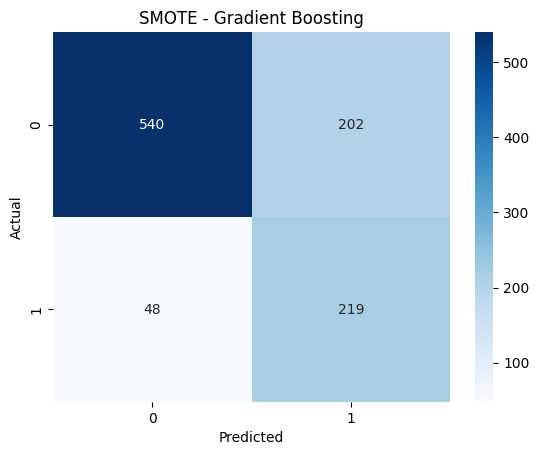

              precision    recall  f1-score   support

           0       0.92      0.73      0.81       742
           1       0.52      0.82      0.64       267

    accuracy                           0.75      1009
   macro avg       0.72      0.77      0.72      1009
weighted avg       0.81      0.75      0.77      1009



In [233]:
# Select the Gradient boosting model from the balanced_pipeline
gboost = balanced_pipeline['Gradient Boosting'] 
# Predictions using the Random Forest model
y_pred_gboost = gboost.predict(x_eval) 
# Calculate the confusion matrix
cm = confusion_matrix(y_eval_encoded, y_pred_gboost)
# Plotting the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SMOTE - Gradient Boosting')
plt.show()
# Calculate the classification report for the gradient boosting  model
report_gboost = classification_report(y_eval_encoded, y_pred_gboost) 
print(report_gboost)

### Balanced Data (Under-sampling)

In [236]:
# Initialize an empty DataFrame to store the evaluation metrics
balanced_table_us = pd.DataFrame(columns=['Models', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])

# Initialize an empty dictionary to store the pipelines
balanced_pipeline_us = {}

# Loop through each model and evaluate
for model_name, classifier in models:
    # Create a pipeline with preprocessing and the classifier
    pipeline = imbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('under-sampler', RandomUnderSampler()),
        ('classifier', classifier)
    ])

    # Fit the pipeline on the training data
    pipeline.fit(x_train, y_train_encoded)
    
    # Predict on the evaluation data
    y_pred = pipeline.predict(x_eval)
    
    # Get classification report as a dictionary
    balanced_metrics_us = classification_report(y_eval_encoded, y_pred, output_dict=True)
    
    # Extract required metrics
    accuracy = balanced_metrics_us['accuracy']
    precision = balanced_metrics_us['weighted avg']['precision']
    recall = balanced_metrics_us['weighted avg']['recall']
    f1 = balanced_metrics_us['weighted avg']['f1-score']
    
    # Append metrics to the DataFrame
    balanced_table_us.loc[len(balanced_table_us)] = [model_name, accuracy, precision, recall, f1]
    
    # Store the pipeline in the dictionary
    balanced_pipeline_us[model_name] = pipeline

# Sort the DataFrame by F1_Score in descending order
balanced_table_us.sort_values(by="F1_Score", ascending=False, inplace=True)

# Display the sorted DataFrame
balanced_table_us

,Models,Accuracy,Precision,Recall,F1_Score
3,Logistic Regression,0.750248,0.810107,0.750248,0.763667
5,Gradient Boosting,0.743310,0.814523,0.743310,0.757779
2,Random Forest,0.737364,0.797399,0.737364,0.751436
1,SVC,0.731417,0.795811,0.731417,0.746114
6,XGBoost,0.728444,0.787464,0.728444,0.742868
0,Decision Tree,0.701685,0.765578,0.701685,0.717844
4,KNN,0.692765,0.776409,0.692765,0.710563


With even lower F1_scores relative to that of the unbalanced table, we can conclude that under-sampling also is not fit for this data

### Confusion matrix for the Logistic Regression model

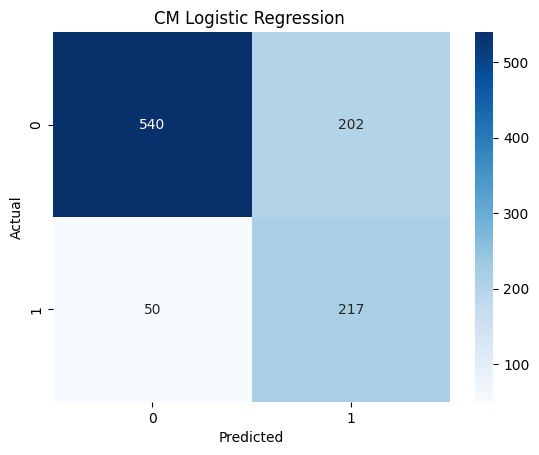

              precision    recall  f1-score   support

           0       0.92      0.73      0.81       742
           1       0.52      0.81      0.63       267

    accuracy                           0.75      1009
   macro avg       0.72      0.77      0.72      1009
weighted avg       0.81      0.75      0.76      1009



In [238]:
regress = balanced_pipeline_us['Logistic Regression'] 
# Predictions using the Logistics regression model
y_pred_regress = regress.predict(x_eval) 
# Calculate the confusion matrix
cm2 = confusion_matrix(y_eval_encoded, y_pred_regress)
# Plotting the confusion matrix
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues') 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('CM Logistic Regression ')
plt.show()
# Calculate the classification report
report_regress = classification_report(y_eval_encoded, y_pred_regress) 
print(report_regress)

### Visualize ROC curve

ROC curve for unbalanced data

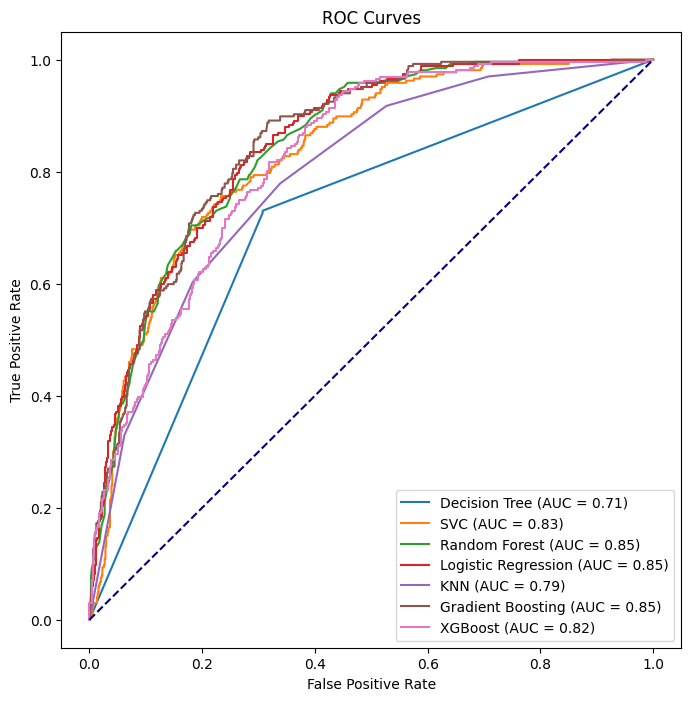

In [241]:

# Initialize a dictionary to store ROC curve data
roc_curve_data = {}

# Create a plot for the ROC curves
fig, ax = plt.subplots(figsize=(8, 8))

# Loop through each model and pipeline to plot the ROC curve
for model_name, pipeline in unbalanced_pipeline.items(): 
    # Get the predicted probabilities for the evaluation data
    y_score = pipeline.predict_proba(x_eval)[:, 1]
    
    # Compute the false positive rate, true positive rate, and thresholds
    fpr, tpr, thresholds = roc_curve(y_eval_encoded, y_score) 
    
    # Compute the AUC (Area Under the Curve)
    roc_auc = auc(fpr, tpr)
    
    # Create a DataFrame for the ROC curve data
    roc_curve_df = pd.DataFrame({ 
        'False Positive Rate': fpr, 
        'True Positive Rate': tpr, 
        'Threshold': thresholds,
    })
    
    # Store the ROC curve data in the dictionary
    roc_curve_data[model_name] = roc_curve_df
    
    # Plot the ROC curve
    ax.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot a diagonal line representing random chance
ax.plot([0, 1], [0, 1], 'k--', color='navy')

# Set plot labels
ax.set_xlabel('False Positive Rate') 
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curves')
ax.legend(loc='lower right')

# Show the plot
plt.show()


### Key Insights

Logistic Regression, Random Forest and Gradient Boosting all had the biggest AUC (0.85).

In [242]:
# Check the logistic regression pipeline
logistics = unbalanced_pipeline['Logistic Regression'] 
logistics



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scalar',
                                                                   RobustScaler()),
                                                                  ('power-transformer',
                                                                   PowerTransformer())]),
                                                  Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['gender', 'InternetService', 'Contract', 'PaymentMethod'], dtype='object'))])),
                ('classifier', LogisticRegression(random_state=42))])

### Feature Selection

In [243]:
# Display the Amount column for further information 
pd.set_option('display.max_rows', None)

In [244]:
# Check data columns after pass through pipeline
feature_columns = logistics.named_steps['preprocessor'].get_feature_names_out() 
feature_columns = np.array([col.split('_')[-1]for col in feature_columns]) 
feature_columns 

array(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Female', 'Male', 'DSL', 'Fiber optic', 'No',
       'Month-to-month', 'One year', 'Two year',
       'Bank transfer (automatic)', 'Credit card (automatic)',
       'Electronic check', 'Mailed check'], dtype='<U25')

In [245]:
# Check importance of features in order (for select features)
importances = abs(logistics.named_steps['classifier'].coef_[0]) 
# For logistic regressio 
importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': importances
})
importance_df

,Feature,Importance
0,SeniorCitizen,0.095862
1,Partner,0.002768
2,Dependents,0.094661
3,tenure,0.388728
4,PhoneService,0.303367
5,MultipleLines,0.024084
6,OnlineSecurity,0.271488
7,OnlineBackup,0.156118
8,DeviceProtection,0.072092
9,TechSupport,0.212282


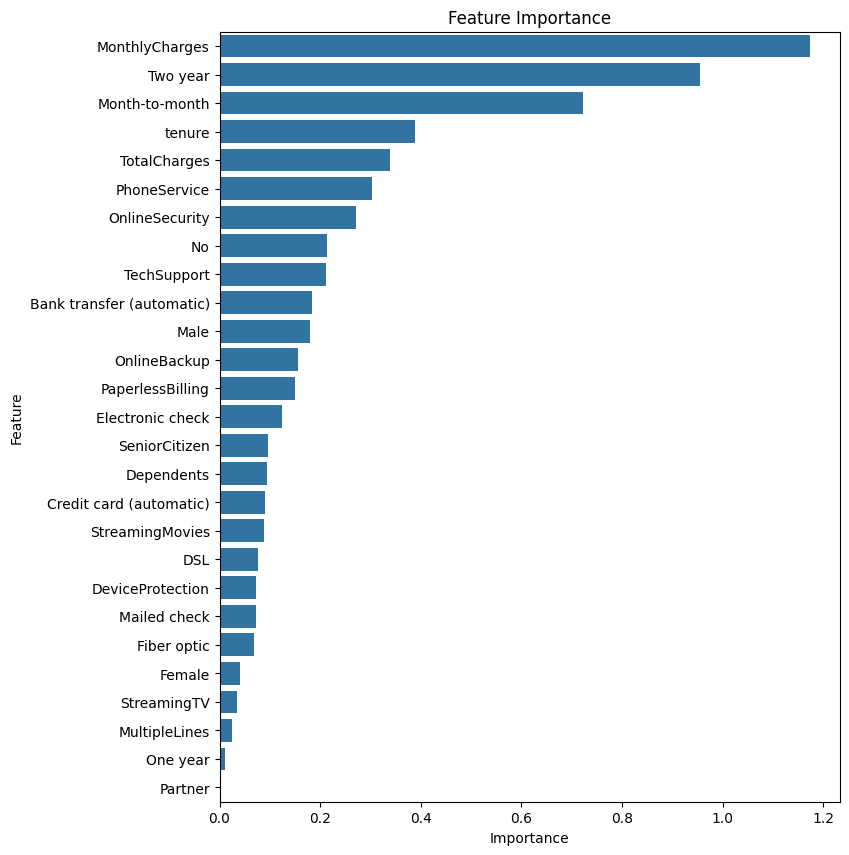

In [248]:
# Show graphically
importance_df_sorted = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 10))
sns.barplot(x='Importance', y='Feature', data=importance_df_sorted)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

It can be observed that the top 5 features with the most significance are:
1. Monthly Charges (it had the highest positive correlation to customer churn- 0.2)
2. Two year and month-to-month are contract types ranking 2nd and 3rd respectively
3. Tenure is the fourth in the list of importance
4. Total charges is the 5th highest score for importance

### Hyperparameter Tuning

In [ ]:
# Set the ranges for tuning the Logistical Regression model parameters
param_grid = [ {
'classifier__penalty': ['l1', 'l2', 'elasticnet', 'none'], 
'classifier__C': np.logspace(-4, 4, 20),
'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
'classifier__max_iter': [100, 1000, 2500, 5000]
} ]

# Assuming logistics is a pipeline with the last step named 'classifier'
grid_search = GridSearchCV( logistics,
param_grid, 
scoring='f1', 
cv=5
)

grid_search.fit(x_train, y_train_encoded)
          # Show the best parameters
best_model_parameters = grid_search.best_params_ 
best_model_parameters

In [ ]:
# Show the best model
best_model= grid_search.best_estimator_ 
best_model

In [ ]:

# Calculate predictions for the evaluation set
y_pred1 = grid_search.best_estimator_.predict(X_eval)

# Calculate classification metrics
bm_metrics = classification_report(y_eval_encoded, y_pred1, output_dict=True)
accuracy = bm_metrics['accuracy']
precision = bm_metrics['weighted avg']['precision']
recall = bm_metrics['weighted avg']['recall']
f1 = bm_metrics['weighted avg']['f1-score']

# Initialize the DataFrame to store metrics
bm_unbalanced_table = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Get the model name
model_name = grid_search.best_estimator_.named_steps['classifier'].__class__.__name__

# Fit metrics into the bm_unbalanced_table
bm_unbalanced_table.loc[len(bm_unbalanced_table)] = [model_name, accuracy, precision, recall, f1]

# Display the table
bm_unbalanced_table


It can be observed that there is no significant change in the F1_score with or without fitting its best parameters. 

### Threshold Selection

In [ ]:
roc_curve_data['Logistic Regression'].head()

## Conclusion

Summary of Key Insights and Recommendations

1. Most of the churned customers had tenures within 1 - 29 months, and customers who passed the 29- month mark generally churned less. Customers generally churned more when they crossed USD 56.15 monthly charge mark, with majority falling between USD 56.15 (lower quartile) and USD 79.65 (median monthly charge of churned customers)
2. Churn levels spiked most when monthly charges were USD 64.45
3. Most of the customers who churned fell within USD 134.46 and USD 2,332.30. This is surprising and may be investigated further as it gives an indication that total charges may not be the sole reason for churn
4. Males are almost just as likely to churn as females. Hence, gender - like total charges - may not be a sole determinant for assessing the likelihood of churn
5. Fibre-optic service users were over twice as likely to churn as compared to DSL users.
6. The churn proportion for electronic checks (45.29%) is concerning, and should be investigated and improved to ensure convenience and ease of use for customers.

Per their confusion matrices and F2 scores, the Logistic regression model (0.80 F1-score) generalizes and performs better on unseen data than the other models. The Logistic regression is therefore recommended for further optimization and deployment.